# Statistics with Python

## Introduction to Python from R

### Libraries 

In R we are used to installing and loading libraries using the commands:

```r
install.packages("palmerpenguins")
library(palmerpenguins)
```

What is happening here? First R looks for this library in a central database called CRAN. R packages here must conform to a relatively strict specification to be stored on CRAN, which makes them more robust and we can trust them working well with other libraries.Once you have downloaded the library, loading it means your R instance can see the files within the copy you have downloaded onto your computer. 


### Python Environments

R packages must conform to a relatively strict specification and they are stored in a centralised database called CRAN. Python is much more anarchistic, people can make libraries and release them with no strict rules. This means there are many more libraries in Python than CRAN!

As a result we need to be careful what Python libraries we install and where. If someone updates a library and you install it, it may not be compatible with other libraries like it was 10 months ago. 

There is a useful package manager called Anaconda, which gives you a huge bundle of useful data science libraries that should be compatible with each other, as people check this carefully for us. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from palmerpenguins import load_penguins


# Set figure styles
plt.style.use('seaborn-v0_8-paper')
sns.set_theme(style="white")
sns.set_style("white")

# high resolution plots
%config InlineBackend.figure_format = 'retina'

penguins = load_penguins()

In [59]:
# Using Pandas to get a quick overview of the data

# Print first 5 rows of the DataFrame
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:


# Pandas describe() function gives a quick overview of the data
penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [4]:

# What is going on here? The penguins variable is an example of a Pandas DataFrame.
type(penguins)

# Dataframes have a number of useful methods and attributes, and we call them by starting with the name of the dataframe variable, and then a full-stop, and then the method name. Methods have round brackets after them.

# For example, penguins.head() method and penguins.describe() method. Try out the following on the penguins dataframe to see what they do:

# penguins.info()
# penguins.tail()





pandas.core.frame.DataFrame

In [5]:
# Dataframes also have attributes, which are like variables that are attached to the dataframe. 
# For example, the shape attribute tells us the number of rows and columns in the dataframe.
# Attributes don't have round brackets after them.

penguins.shape

# Get the following attributes from the penguins dataframe to see what they are:

# penguins.columns
# penguins.ndim
# penguins.size




(344, 8)

<AxesSubplot: xlabel='body_mass_g', ylabel='bill_length_mm'>

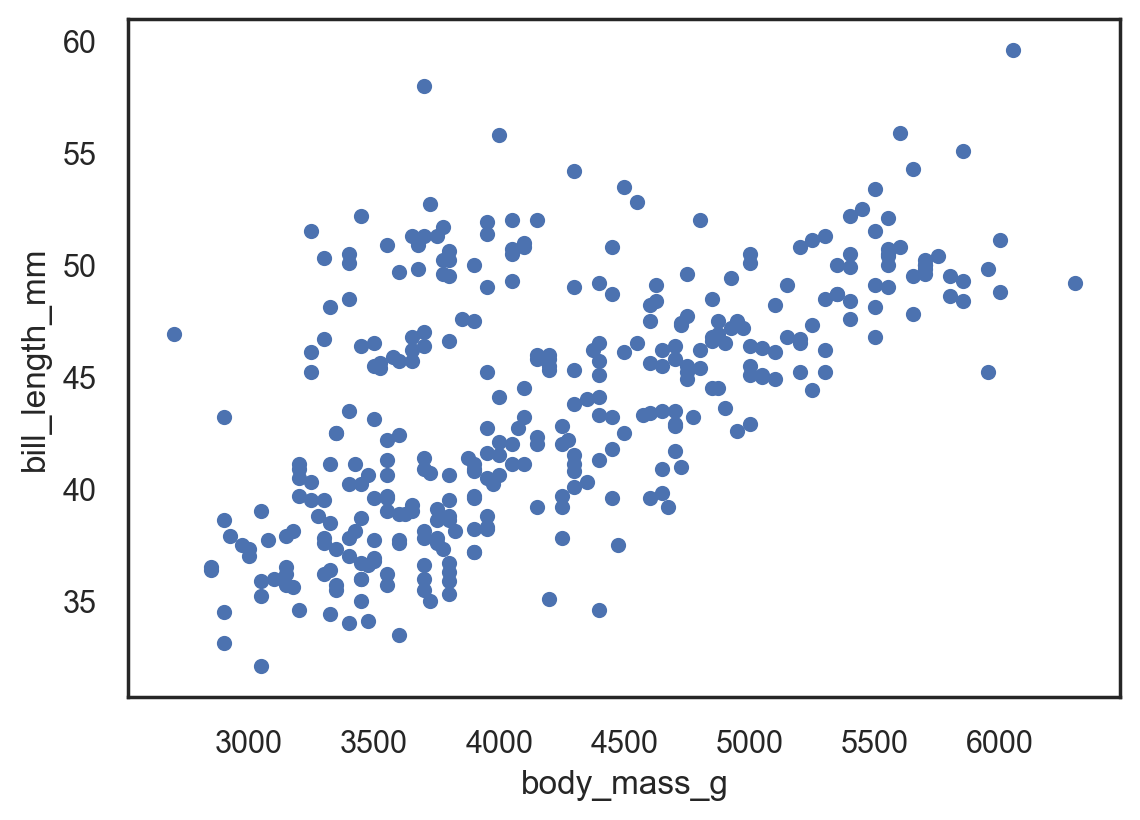

In [6]:
# Pandas dataframes also have plotting methods, which are useful for quickly visualising the data. However, we need to specify which columns we want to plot against each other.

penguins.plot(kind="scatter", x="body_mass_g", y="bill_length_mm")

# We're using the plot() method, and then using the column names (check the table above) as arguments to the x and y parameters. 

# Change x and y to plot different columns against each other. Because we're using text as inputs and not numbers, we need to use quotes around the column names.


In [7]:

# Pandas helps us subsets of data from the dataframe.

# If we want to select a single column, we can use the following syntax:
penguins["species"]

# To load the raw data from palmer penguins, we can use the following syntax:

# The square brackets are used to select a column from the dataframe. The column name is inside the square brackets, and it is a string, so it is inside quotes.

# You may want to check what column names are available in the dataframe. You can do this by using the columns attribute.
penguins.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [8]:

# To select the first row, we can use the following syntax:
penguins.loc[0]

# IMPORTANT NOTE! Python is zero-indexed, unlike R! So the first row is row 0.

# The loc method is used to select a row from the dataframe. The row number is inside the square brackets, and it is an integer, so it is not inside quotes. You'll notice the result is the row printed from top to bottom, with the column names on the left.


species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       male
year                      2007
Name: 0, dtype: object

In [9]:

# We can also use the following useful syntax to print every column for a given row:
penguins.loc[0,:]

# The : here means we want everything, in this case every column. If we want a single row from a named column, we can use the following syntax:
penguins.loc[100,"species"]

# You can also use the iloc method if you only know the column number, not its name. 
penguins.iloc[100,0]


'Adelie'

In [10]:
# If we want multiple rows, we can use the following syntax:
penguins.loc[[0,1,2,3,4],"species"]

# Here we have used a list of row numbers inside the square brackets. # In Python, lists are created using square brackets, and the elements are separated by commas.

# We can also do this for the columns and have a list of strings inside the square brackets:
penguins.loc[0,["species","island"]]


# We can also use the following syntax for a range of rows rather than writing each row number individually:
penguins.loc[0:4,"species"]

penguins.loc[0:4,["species","island"]]

# When there is more than one column, the result is a dataframe. When there is a single column, the result is a series, and they print differently.

,species,island
0,Adelie,Torgersen
1,Adelie,Torgersen
2,Adelie,Torgersen
3,Adelie,Torgersen
4,Adelie,Torgersen


In [11]:
# Now our challenge is to just plot a single species. First, we can take our species column and use the double equals sign, this is a conditional operator.
penguins["species"] == "Adelie"

# We see what is printed is a series of True and False values. This is because we are comparing each value in the species column to the string "Adelie". If the value is equal to "Adelie", then the result is True, otherwise it is False.

# We can use this series of True and False values to select only the rows where the species is Adelie. 

# One way is to make a new variable of our True False values:
is_adelie = penguins["species"] == "Adelie"

# A single equals sign is used to assign a value to a variable. A double equals sign is used to compare values.

# Then we can use this variable to select only the rows where the species is Adelie. Here we start with the dataframe name, then the square brackets indicate we just want a subset of the data. Within the square brackets, we're asking for the rows where the is_adelie variable is True.

penguins[is_adelie]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,female,2009
148,Adelie,Dream,36.0,17.8,195.0,3450.0,female,2009
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male,2009
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female,2009


<AxesSubplot: title={'center': 'Adelie Penguins only'}, xlabel='body_mass_g', ylabel='bill_length_mm'>

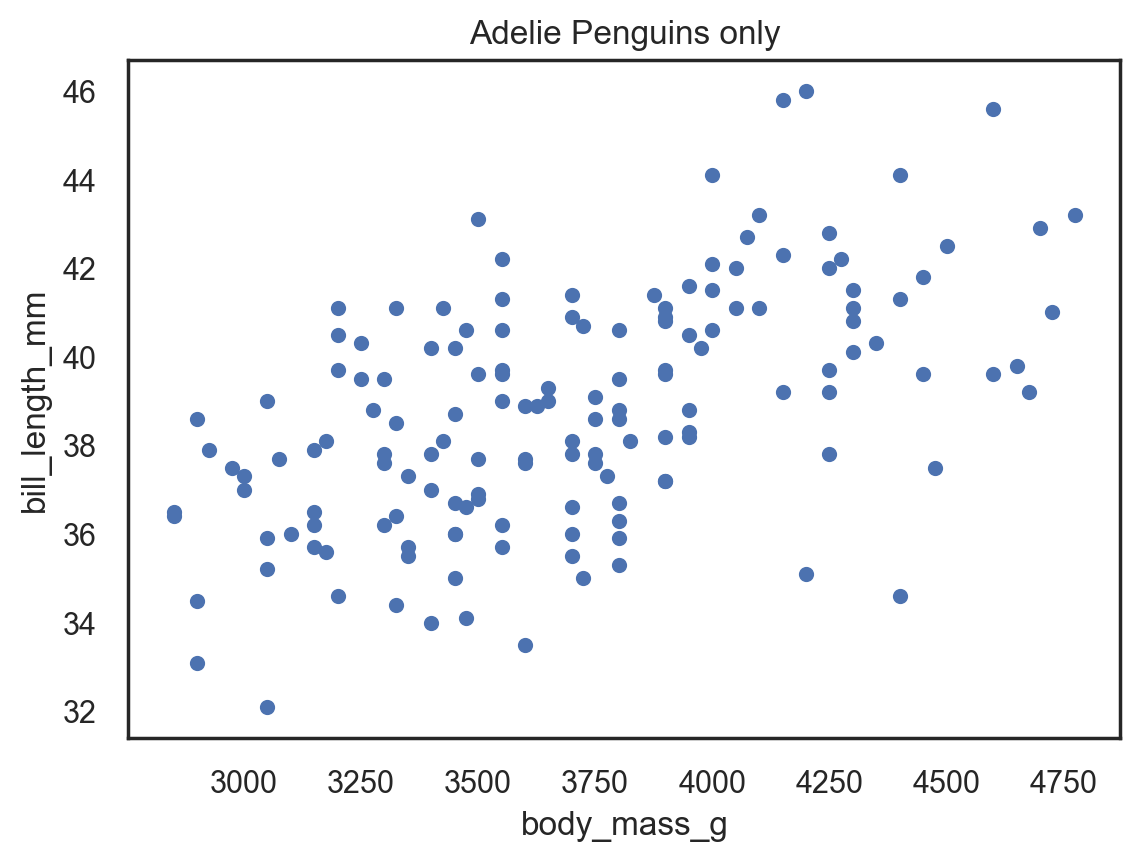

In [12]:
# We can also do this in one line. Rather than the is_adelie variable, we can just put the conditional statement directly in the square brackets:
penguins[penguins["species"] == "Adelie"]

#  where the species is Adelie. This is the same as the previous line of code.

# Now we can save this subset of data to a new variable:
adelie_only = penguins[penguins["species"] == "Adelie"]

# And we can plot it:
adelie_only.plot(kind="scatter", x="body_mass_g", y="bill_length_mm", 
                 title="Adelie Penguins only")

Text(0, 0.5, 'Bill length (mm)')

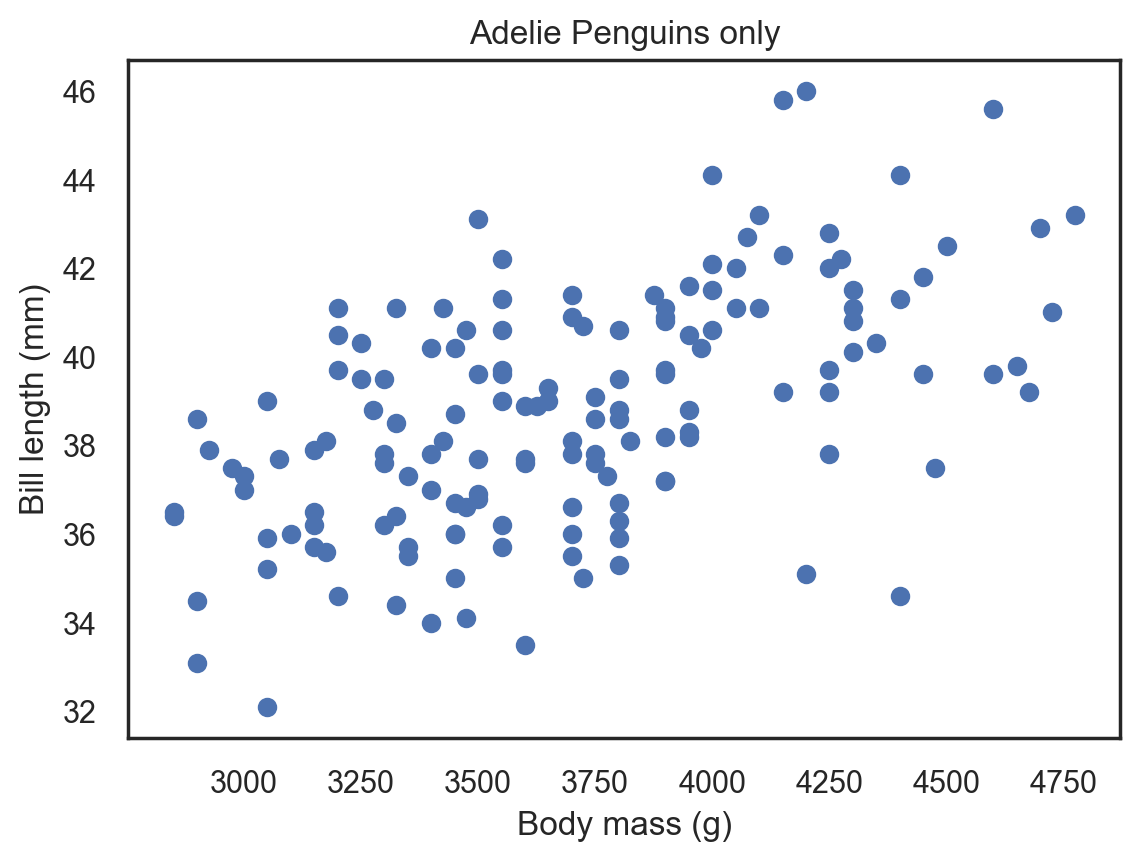

In [13]:
# The inbuilt pandas plotting methods are useful for quickly visualising the data, but if we want more complex plots we can use the matplotlib library.

# We can use the matplotlib library to plot the same data as above, but we need to import the library first:
import matplotlib.pyplot as plt

# We can then use the plt.plot() method to plot the data. The first argument is the x values, and the second argument is the y values.
plt.scatter(adelie_only["body_mass_g"], adelie_only["bill_length_mm"])

# This time we have a plot object, which means we can add information in further lines of code. For example, we can add a title:
plt.title("Adelie Penguins only")

# We can also add axis labels:
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")



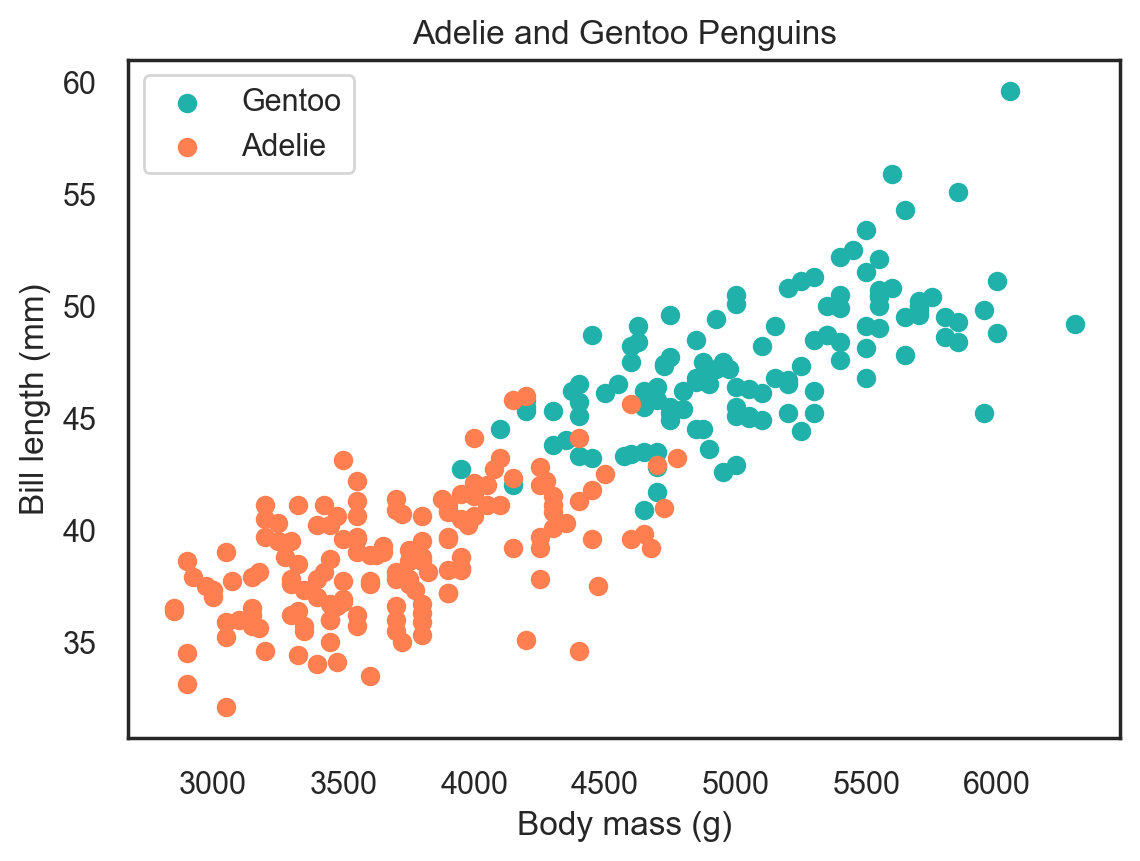

In [14]:
# This is helpful when we want to add a second plot over the top. For example, we can plot the Gentoo penguins on the same plot:. First we subset the Gentoo penguins from the penguins dataframe:

gentoo_only = penguins[penguins["species"] == "Gentoo"]

# Then we plot the Gentoo penguins on the same plot as the Adelie penguins:
plt.scatter(gentoo_only["body_mass_g"], gentoo_only["bill_length_mm"], color="lightseagreen")
plt.scatter(adelie_only["body_mass_g"], adelie_only["bill_length_mm"], color="coral")

# We used two different colours, I chose these colours from the matplotlib colour map. You can find a list of colours here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# Now we can add the rest of the plot:

plt.title("Adelie and Gentoo Penguins")
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")

# We can also add a legend to the plot (Important! This list of penguin names is in the same order as they were plotted):
plt.legend(["Gentoo", "Adelie"])

plt.show()

# Edit this code to add the Chinstrap Penguins. You can use the same method as above, but you'll need to include a colour and the label in the legend.

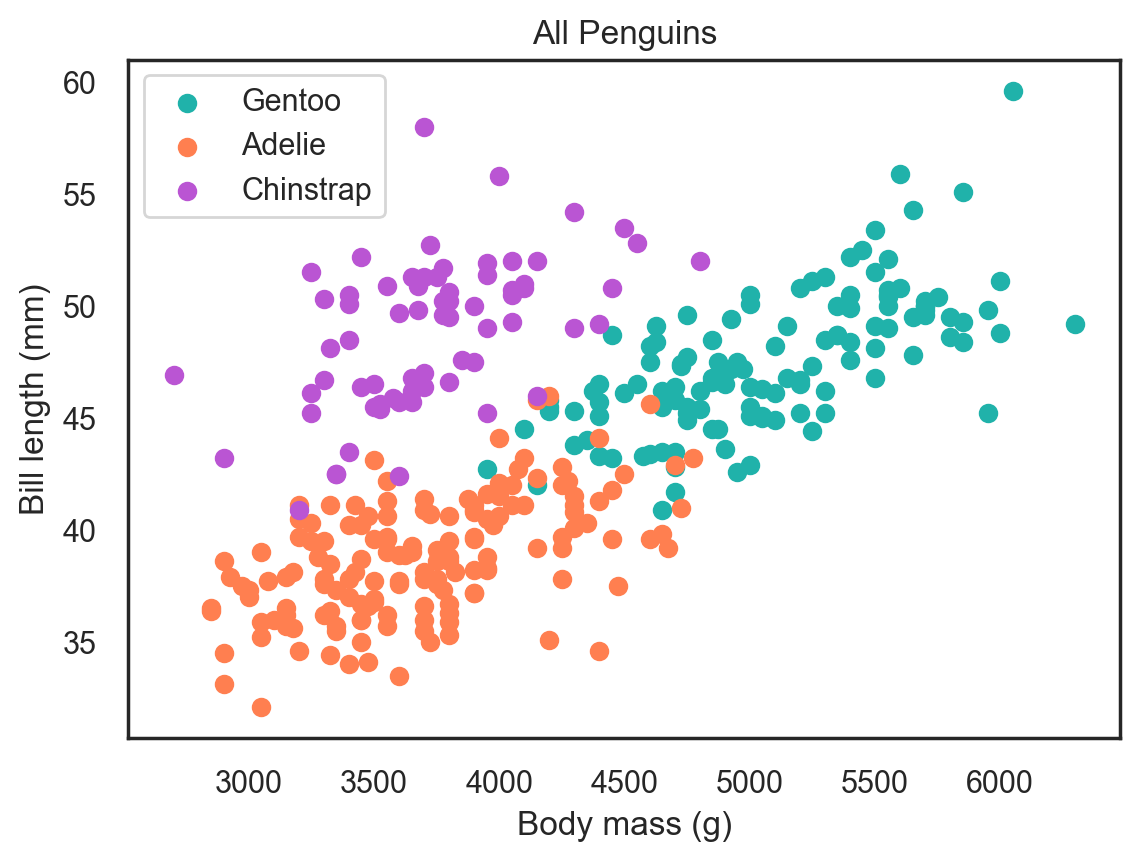

In [15]:
# Let's look at this code again. I'll include the previous code for subsetting the adelie penguins again:
adelie_only = penguins[penguins["species"] == "Adelie"]
gentoo_only = penguins[penguins["species"] == "Gentoo"]
chinstrap_only = penguins[penguins["species"] == "Chinstrap"]

# Then we plot the Gentoo penguins on the same plot as the Adelie penguins:
plt.scatter(gentoo_only["body_mass_g"], gentoo_only["bill_length_mm"], color="lightseagreen")
plt.scatter(adelie_only["body_mass_g"], adelie_only["bill_length_mm"], color="coral")
plt.scatter(chinstrap_only["body_mass_g"], chinstrap_only["bill_length_mm"], color="mediumorchid")

plt.title("All Penguins")
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")

# We can also add a legend to the plot (Important! This list of penguin names is in the same order as they were plotted):
plt.legend(["Gentoo", "Adelie", "Chinstrap"])


# We're copying and using code over and over again, which isn't usually a good plan. Mistakes are easy to make, and code will get very tedious if you need to repeat this 10 times or more!

# We can use a for loop to repeat the same code over and over again. A for loop is a way of repeating a block of code a set number of times. Let's see an example below.



In [16]:
# First we need a list of penguin species. We can write this manually, but we might not immediately know how many penguin species there are. This means we can get the computer to do this step for us. 

# We can use the unique() method to get a list of unique values in the species column:

penguins["species"].unique().tolist()

# First we take the species column only, and then we use the method .unique() to find all the unique values. I want the answer to be a list, so I add another method on the end called .tolist().
# We can chain methods like this to do multiple things in one line of code.

# We can save this list to a variable:
species_list = penguins["species"].unique().tolist()

# What we want Python to do is to repeat the same code for each species. Lets try and easy example. A for loop is a way of repeating a block of code a set number of times. 

for species in species_list:
    print(species)
print("Done!")

# First we start with "for" which means we're about to start a "for loop", which is where we know how many loops we want. We give the for loop the list of species. Then we use the word "in" to say we want to loop through the list. 

# Every "thing" it finds in the list gets called "species" in the loop. It doesn't matter what we call it, but it is important to make code very clear and obvious to anyone reading it. Then we use a colon to say we're about to start the code block.

# Then we indent the code block. This is important, because it tells Python that the code block is part of the for loop. If we don't indent the code block, Python will think it's a separate piece of code, and it won't be part of the for loop.

# We can use the print() function to print the species name to the screen. 

# After the loop is finished, we can also add a print statement at the end of the loop to say "Done!". Try indenting this print statement to see what happens.

Adelie
Gentoo
Chinstrap
Done!


Text(0, 0.5, 'Bill length (mm)')

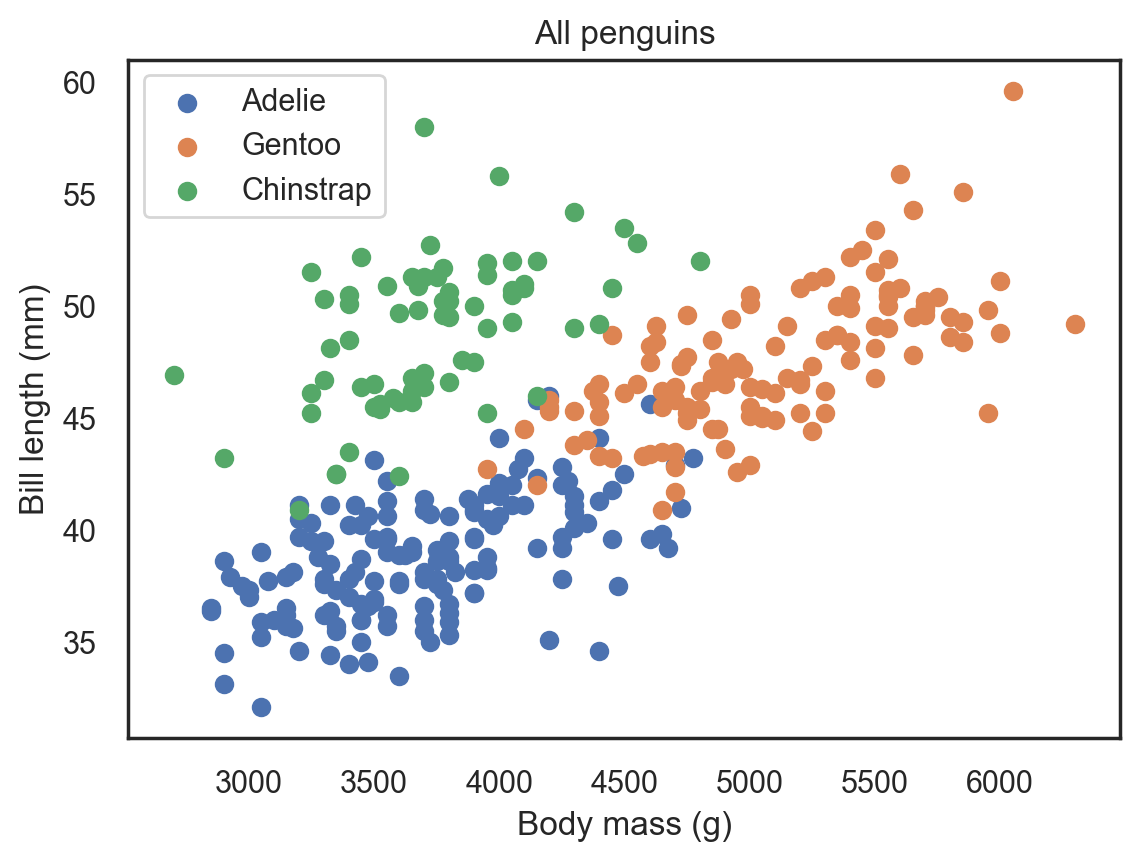

In [17]:
# We can use a for loop to plot the data for each species. 

# First we need to create a new plot:
plt.figure()

# Then we can use a for loop to plot the data for each species:
for species in species_list:
    subset_species_only = penguins[penguins["species"] == species]
    plt.scatter(subset_species_only["body_mass_g"], 
                subset_species_only["bill_length_mm"], label=species)

# Read through the code above carefully.

# First it creates a new plot. This is important, because if we don't do this, the plot will be overwritten each time the loop runs.

# Then it loops through the list of species names. Each time the loop runs, "species" changes. 
# 
# The next line subsets the main penguin dataset using the == sign. 

# The next line plots that subset of data. We use the label argument to add the species name to the legend. This is very helpful so we don't mix up which penguin was plotted first. Previously we had "hardcoded" the legend, which is a bad idea because it's easy to make mistakes.

# Now when we add a legend it knows which is which:
plt.legend()

# And the rest of the plot
plt.title("All penguins")
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")


In [18]:

# Advanced! Currently matplotlib is choosing what colour to use for each species. We can create a special variable in Python called a dictionary. A dictionary is a way of storing data in a key-value pair. That way it will know what colour is associated with each species.

# We can create a dictionary like this:
colour_dict = {"Adelie": "coral", "Gentoo": "lightseagreen", "Chinstrap": "mediumorchid"}

# The syntax is very particular here, but it means if we know the species name, we can look up the colour in the dictionary.
print(colour_dict["Adelie"])

# This will also work if we save the string a variable:
my_string = "Adelie"
print(colour_dict[my_string])

# What is going on here? we have our dictionary called colour_dict. Then we use square brackets to look up the value associated with the key "Adelie". The value it returns is "coral". It is similar to how our dataframe works when we call a specific column name in the square brackets. 

# So now we can edit our plotting for loop...

coral
coral


Text(0, 0.5, 'Bill length (mm)')

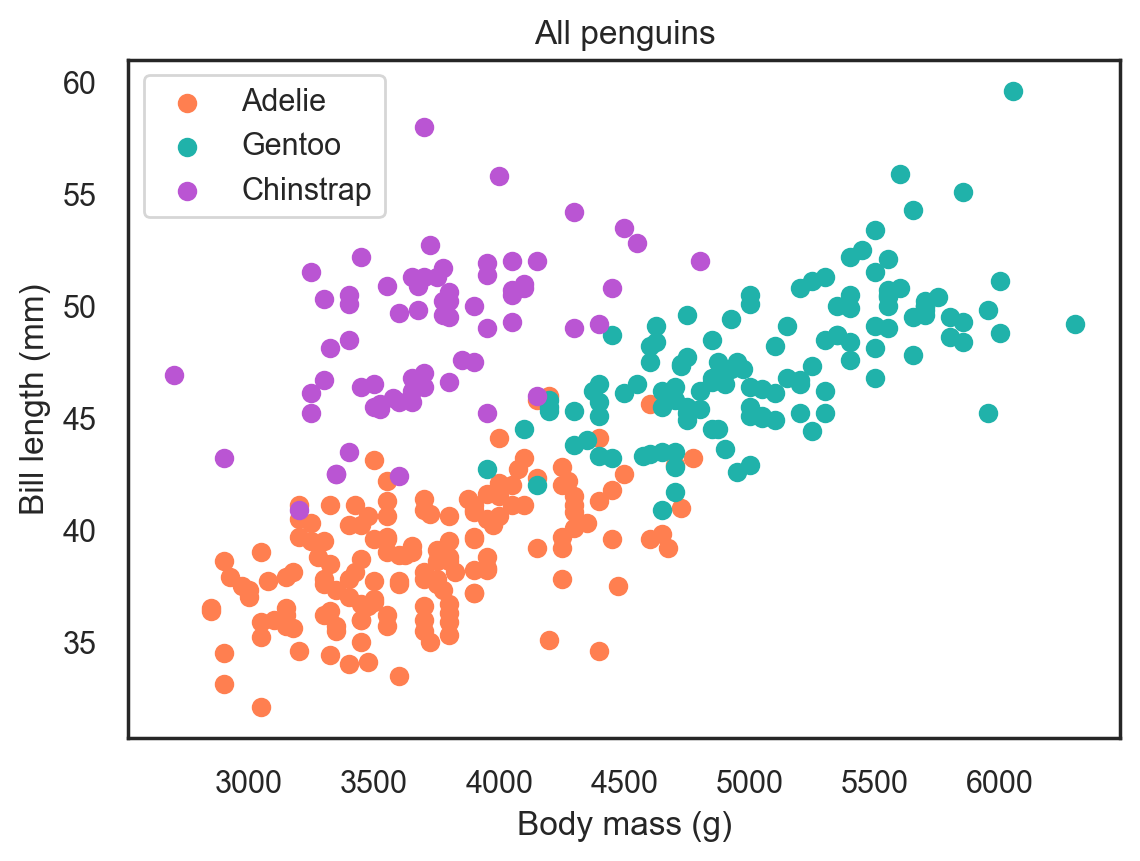

In [19]:
# First defining our colour dictionary...
colour_dict = {"Adelie": "coral", "Gentoo": "lightseagreen", "Chinstrap": "mediumorchid"}

# Then start the figure
plt.figure()

# Then we can use a for loop to plot the data for each species:
for species in species_list:
    # Subset the data for the species
    subset_species_only = penguins[penguins["species"] == species]

    # We're looking up the colour we should be using in the dictionary:
    current_colour = colour_dict[species]

    # Plot the subset using the specific colour
    plt.scatter(subset_species_only["body_mass_g"], 
                subset_species_only["bill_length_mm"], label = species, color = current_colour)

plt.legend()

# And the rest of the plot
plt.title("All penguins")
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")


(array([ 3., 12., 13., 30., 32., 39., 35., 18., 25., 17., 19., 22., 16.,
        12., 10., 17., 11.,  5.,  5.,  1.]),
 array([2700., 2880., 3060., 3240., 3420., 3600., 3780., 3960., 4140.,
        4320., 4500., 4680., 4860., 5040., 5220., 5400., 5580., 5760.,
        5940., 6120., 6300.]),
 <BarContainer object of 20 artists>)

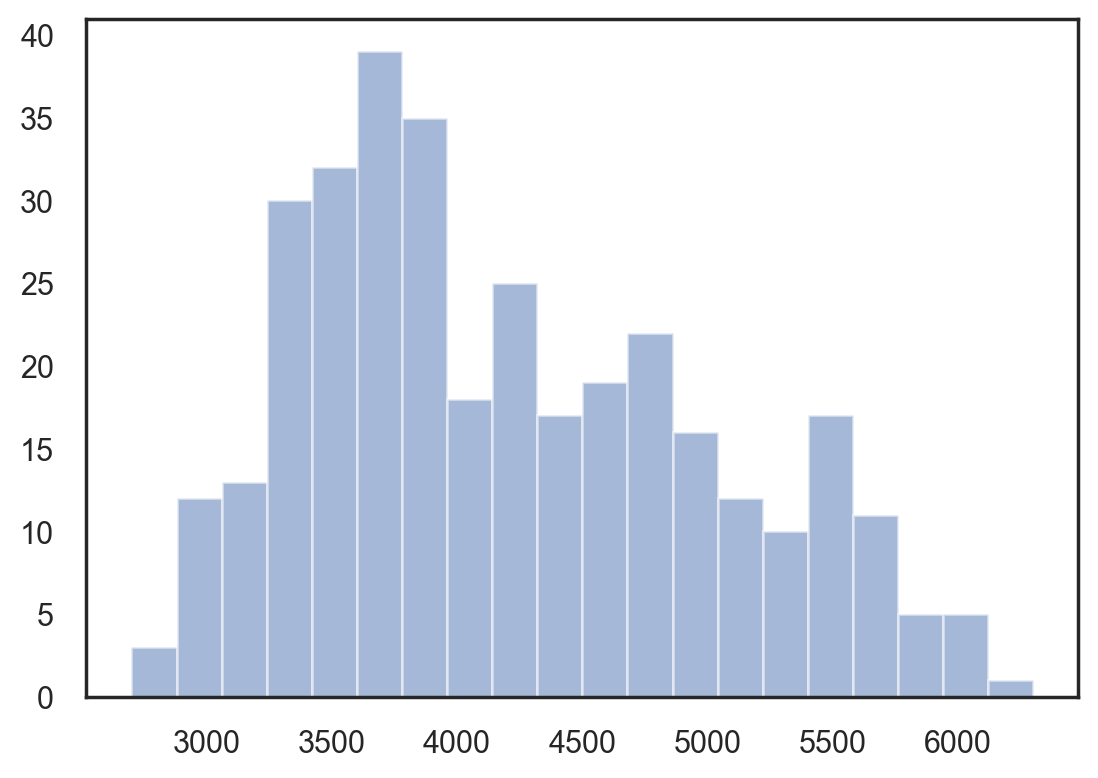

In [20]:

# Try to now plot some histograms for a given variable in the data frame with each species over the top of each other using a for loop. You can use the code above as a template. 

# You can make sure your histogram is slightly transparent by adding the argument alpha = 0.5. 
plt.figure()
plt.hist(penguins["body_mass_g"], bins=20, alpha = 0.5, label = "All penguins")

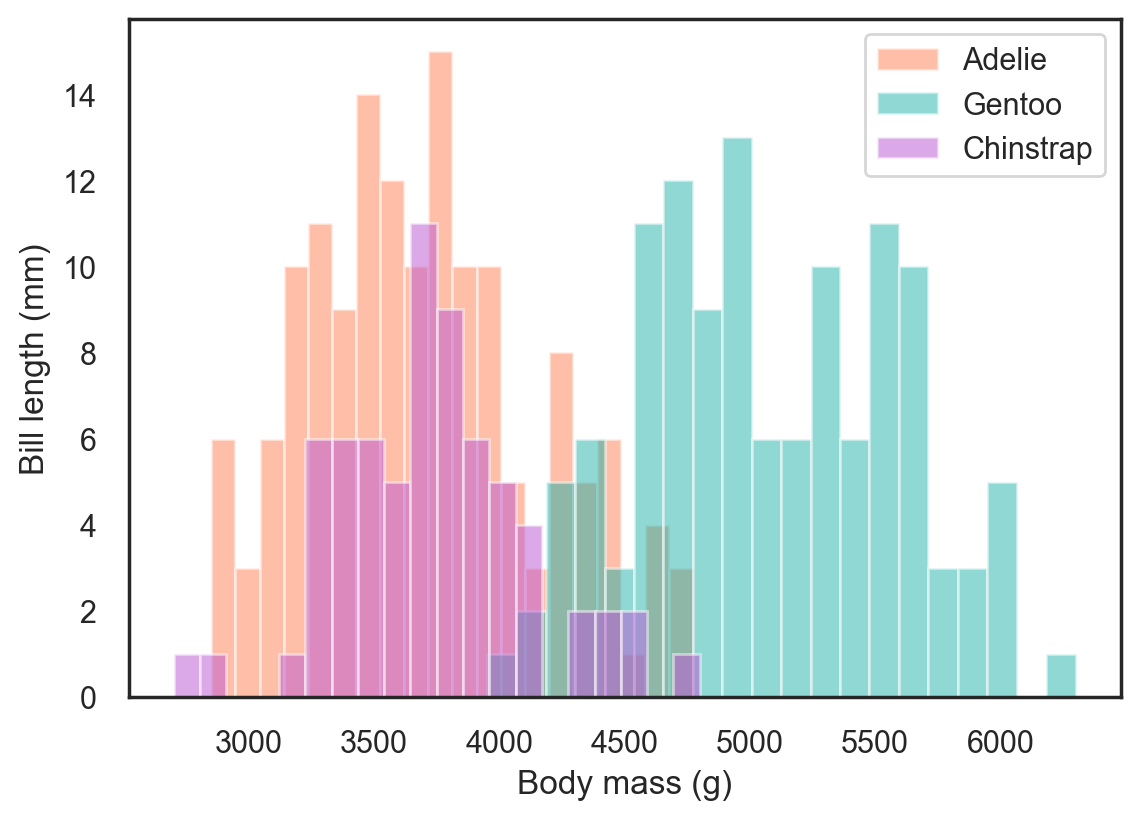

In [56]:
for species in species_list:
    subset_species_only = penguins[penguins["species"] == species]

    plt.hist(subset_species_only["body_mass_g"], bins=20, alpha = 0.5, label = species, color = colour_dict[species])

plt.legend()

# And the rest of the plot
plt.xlabel("Body mass (g)")
plt.ylabel("Bill length (mm)")
plt.legend()

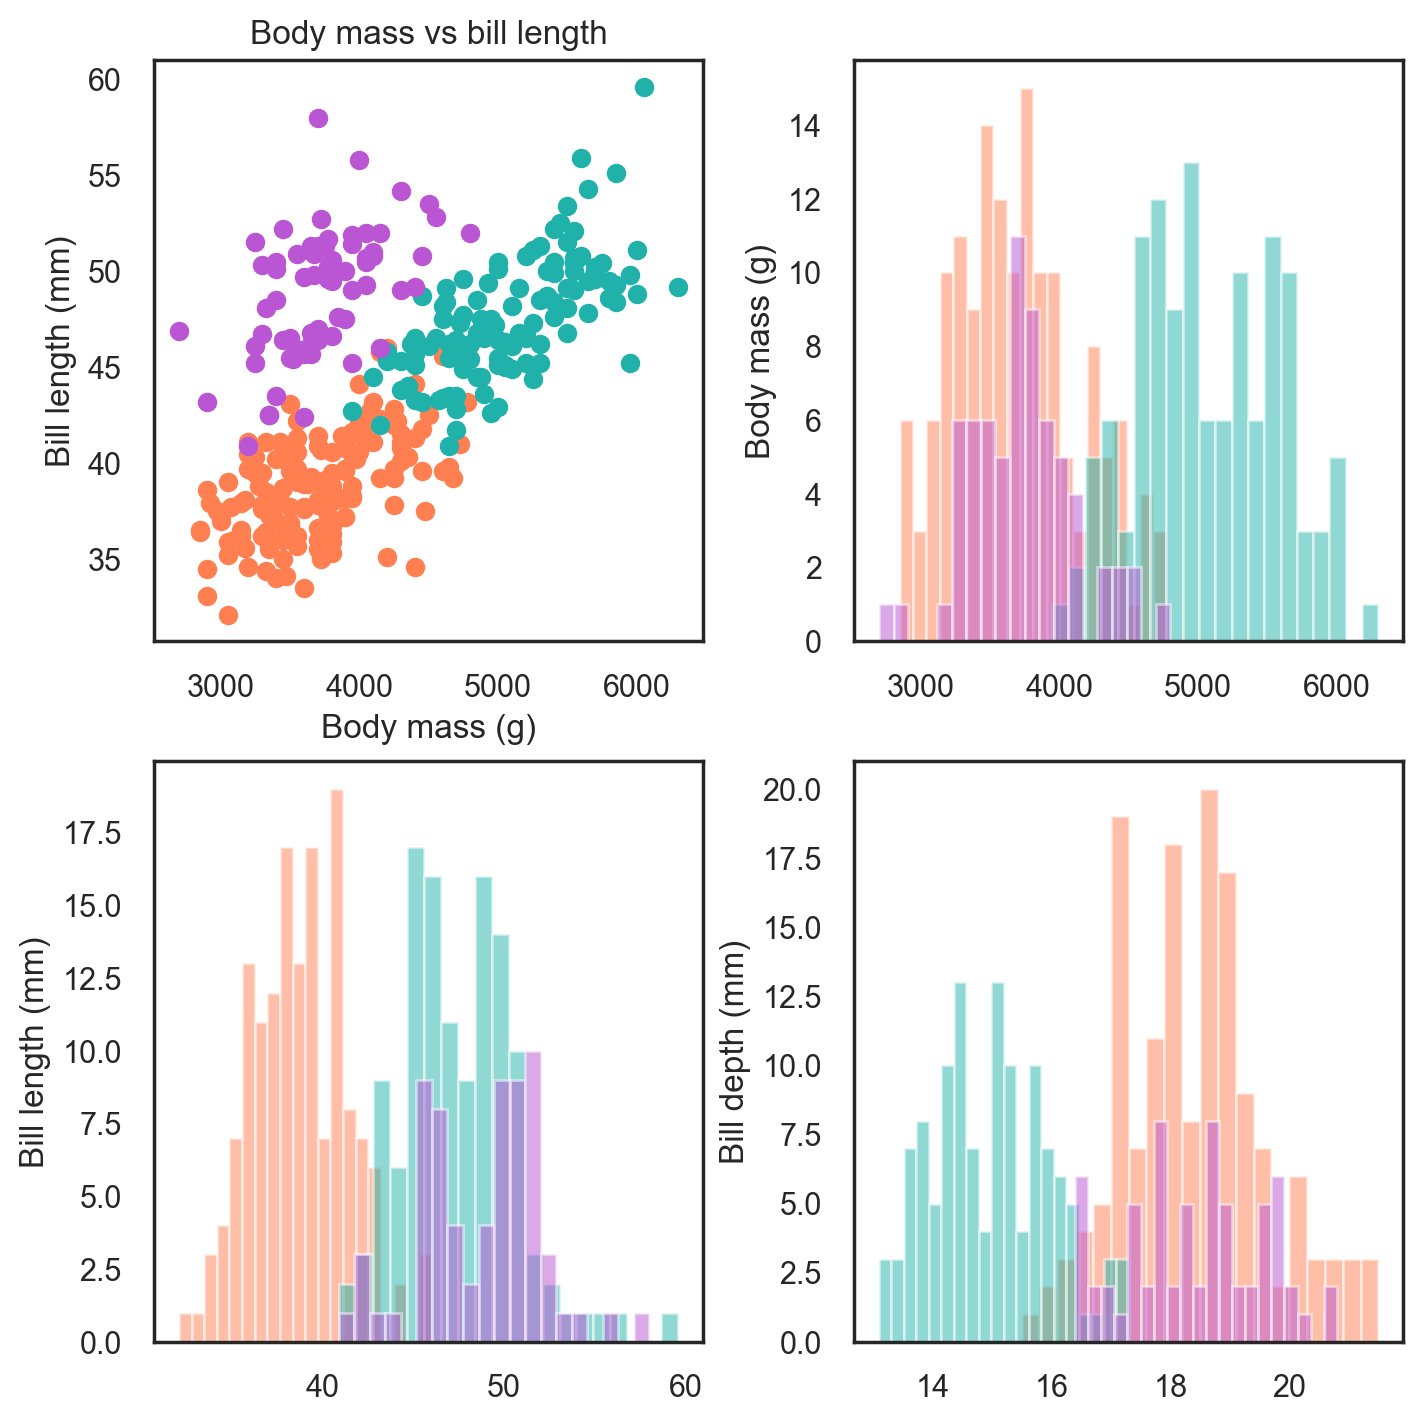

In [21]:
# We can also use a for loop to plot subplots. This is a bit more complicated, but it's a good way to learn how to use subplots.

# First we need to create a new figure with subplots. We can do this with the subplots() function. We need to tell it how many rows and columns we want. We can also tell it how big we want the figure to be. Constrained_layout=True will make sure the subplots don't overlap.

fig, ax = plt.subplots(2, 2, figsize=(7, 7),constrained_layout=True)

# We have made two variables. One is called "fig" -- the figure itself. The "ax" variable is a list of the axes, each one is a subplot in a 2x2 formation. 
# The first top left subplot is ax[0,0]. The second top right subplot is ax[0,1]. The first bottom left subplot is ax[1,0]. The second bottom right subplot is ax[1,1]. Remember, python starts counting at 0, not 1.

# We can use a for loop to plot the data for each species:
for species in species_list:
    # Subset the data for the species
    subset_species_only = penguins[penguins["species"] == species]

    # We're looking up the colour we should be using in the dictionary:
    current_colour = colour_dict[species]

    # Plot the subset using the specific colour
    ax[0, 0].scatter(subset_species_only["body_mass_g"], 
                subset_species_only["bill_length_mm"], label = species, color = current_colour)
    ax[0, 0].set_title("Body mass vs bill length")
    ax[0, 0].set_xlabel("Body mass (g)")
    ax[0, 0].set_ylabel("Bill length (mm)")


    ax[0, 1].hist(subset_species_only["body_mass_g"], bins=20, alpha = 0.5, label = species, color = current_colour)
    ax[0, 1].set_ylabel("Body mass (g)")

    ax[1, 0].hist(subset_species_only["bill_length_mm"], bins=20, alpha = 0.5, label = species, color = current_colour)
    ax[1, 0].set_ylabel("Bill length (mm)")

    ax[1, 1].hist(subset_species_only["bill_depth_mm"], bins=20, alpha = 0.5, label = species, color = current_colour)
    ax[1, 1].set_ylabel("Bill depth (mm)")
plt.show()

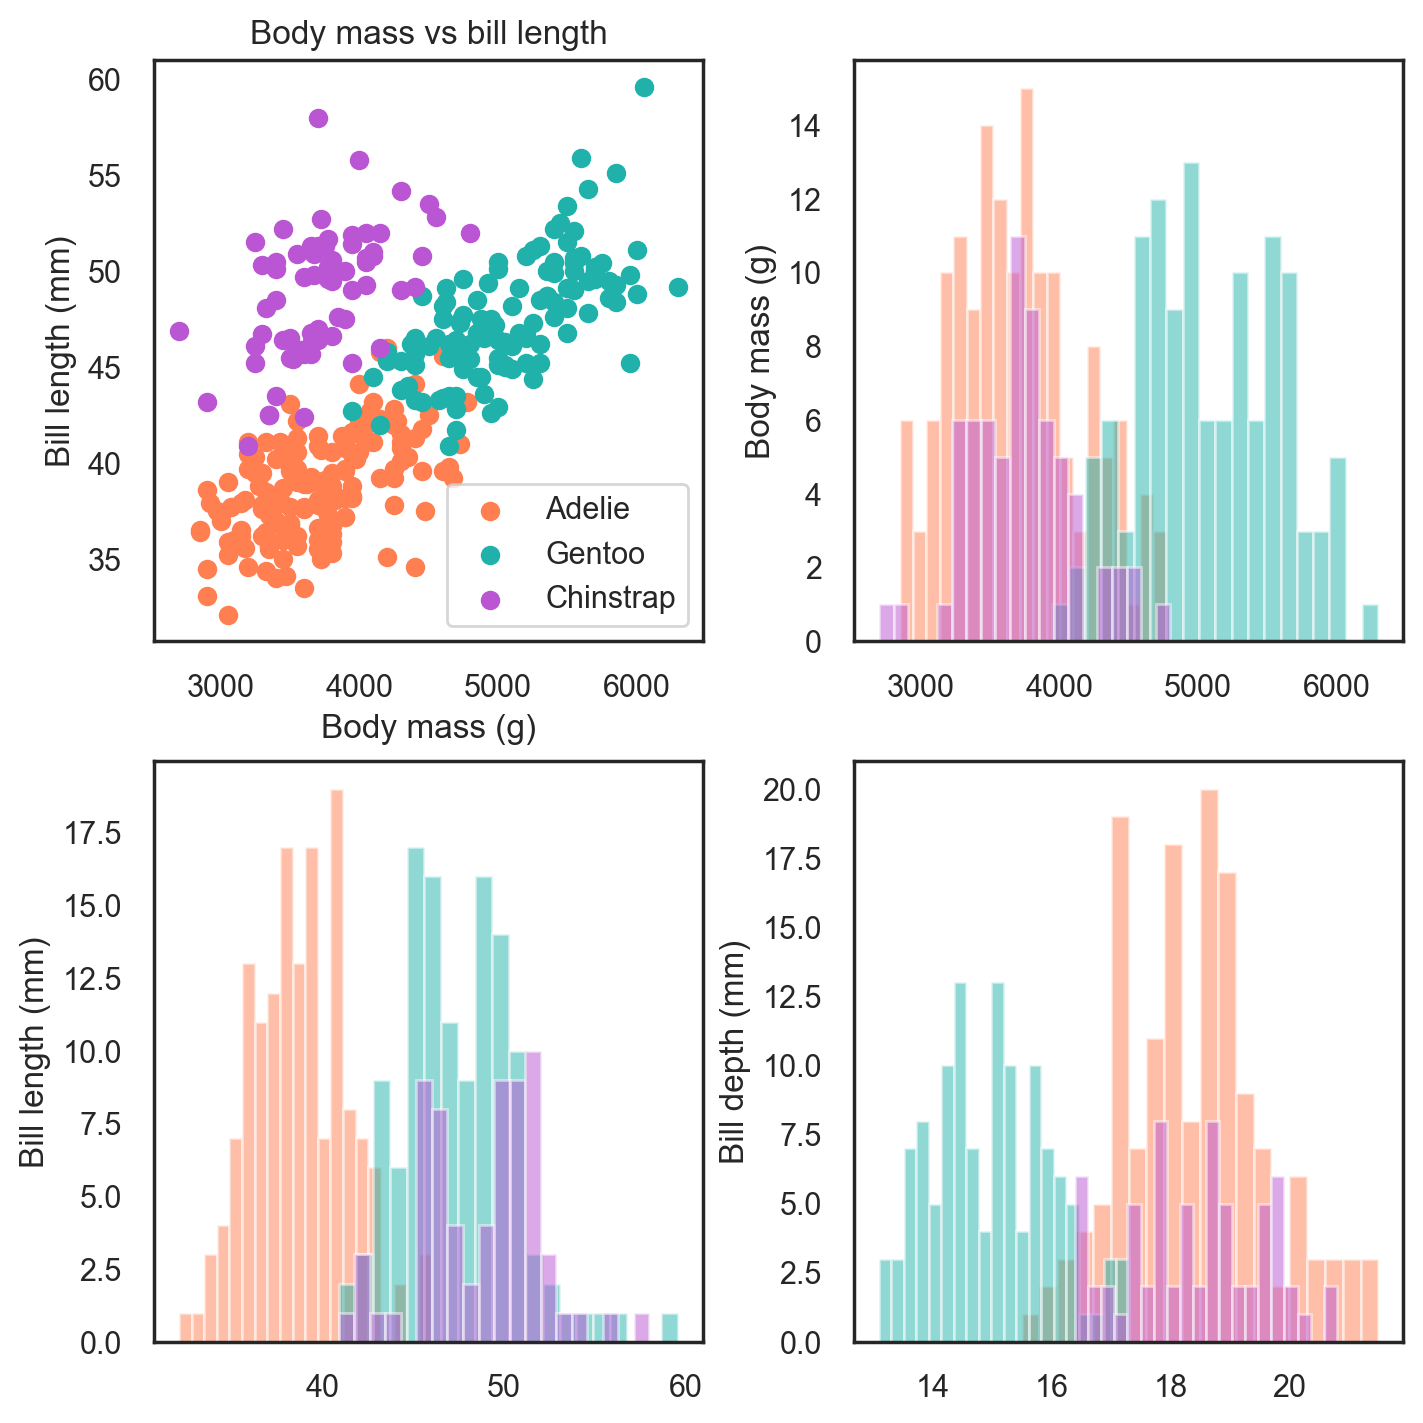

In [22]:
# You'll notice that we had some lines that were repeating throughout that loop. Which means we probably want a loop within our loop. 

# We're going to make a dictionary which contains the names of the variables we want to plot as they appear in the dataframe, linked with the name we want on the axis. 
data_variable_dict = {"body_mass_g"     :   "Body mass (g)", 
                      "bill_length_mm"  :   "Bill length (mm)", 
                      "bill_depth_mm"   :   "Bill depth (mm)"}

fig, axes = plt.subplots(2, 2, figsize=(7, 7),constrained_layout=True)

for species in species_list:
    # Subset the data for the species
    subset_species_only = penguins[penguins["species"] == species]

    # We're looking up the colour we should be using in the dictionary:
    current_colour = colour_dict[species]

    # Plot the subset using the specific colour
    axes[0, 0].scatter(subset_species_only["body_mass_g"], 
                subset_species_only["bill_length_mm"], label = species, color = current_colour)
    axes[0, 0].set_title("Body mass vs bill length")
    axes[0, 0].set_xlabel("Body mass (g)")
    axes[0, 0].set_ylabel("Bill length (mm)")
    axes[0, 0].legend()
    # Rather than repeating, here we can start another loop. 
    # We're going to loop through the subplots. There is some magic going on here so I'll explain carefully. 

    # First we're defining a counter to start us off. We want to start at the second subplot, so we start at 1. (!)
    counter = 1

    # Next we create the for loop but using our column dictionary. We're looping through the "keys", which are the names of the columns in the dataframe.
    # Python is nice because you can read it like English. "For each column name in the dictionary, do the following:"
    for column_name in data_variable_dict.keys():

        # We need to indent again because this code block is part of the loop.

        # We're going to use the counter to tell us which subplot we're on. 
        # This is a bit of magic, but flatten method turns our ax[0,1] into ax[1], ax[1,0] into ax[2] and so on.
        # We use square brackets to specify which subplot we want. 
        current_ax = axes.flatten()[counter]

        # We take the current axis we've selected, and now we're going to plot the histogram. Remember, we're still in the species loop! (Inception)
        # So you can see "subset_species_only" is still being used, as is the current_colour.

        # Then we're only plotting the column name we're currently on. So within the data subset we call the column we want using square brackets. 
        current_ax.hist(subset_species_only[column_name], bins=20, alpha = 0.5, label = species, color = current_colour)

        # And as before, we set the axis label, and this time we're using the dictionary to get the name of the variable we want to use. 
        # So we use the column name from the dictionary to get the axis label we want to use.
        current_ax.set_ylabel(data_variable_dict[column_name])

        # This inner loop has now finished and so we can increase the counter by 1.
        counter = counter + 1
plt.show()

# You can see that rather than those lines repeating, we've put them in a loop, even within the loop we already set up. This is much less likely to lead to mistakes. 



In [23]:
# Now we have understood figures with matplot lib, we have also looked at strings, lists, for loops, at conditional statements, and dictionaries.

# We have also done the first part of statistical analysis, which is data exploration. We can now do some statistical analysis.

# First, lets run a T-test to see if there is a difference in mass between two species, Adelie and Gentoo.
# We can use the scipy.stats library to do this.
import scipy.stats as stats

# We're going to use the body mass data for Adelie and Gentoo. Remember, we can use square brackets to subset the data and then use the column name to get the data we want.
adelie_body_mass = penguins[penguins["species"] == "Adelie"]
adelie_body_mass = adelie_body_mass["body_mass_g"]

# We can do this in one step by having the square brackets after the first. 
gentoo_body_mass = penguins[penguins["species"] == "Gentoo"]["body_mass_g"]


In [24]:

# We're going to use the ttest_ind function. This is an independent t-test.
ttest_results = stats.ttest_ind(adelie_body_mass, gentoo_body_mass)

# We can print the results.
print(ttest_results)

# Oh no, it's not working. 

Ttest_indResult(statistic=nan, pvalue=nan)


In [25]:
# That's because our dataset has some missing values. We can check this by using the isna() function.
print(penguins.isna().sum())

# We need to clean our data a bit and remove any lines with missing values before we run the t-test.
# We can do this using the dropna() function.
penguins_clean = penguins.dropna().copy()

print(penguins_clean.isna().sum())

# # You'll notice we just replaced the penguins dataframe with a new one. We then need to remake adelie_body_mass and gentoo_body_mass!
adelie_body_mass = penguins_clean[penguins_clean["species"] == "Adelie"]["body_mass_g"]
gentoo_body_mass = penguins_clean[penguins_clean["species"] == "Gentoo"]["body_mass_g"]


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [26]:

# Now we can run the t-test again.
ttest_results = stats.ttest_ind(adelie_body_mass, gentoo_body_mass)

print(ttest_results)

# It is a bit difficult to read. What we would like is for the computer to tell us whether the p-value is above the critical threshold or not using words. 
# We can do this using an if statement.


Ttest_indResult(statistic=-23.466803147391744, pvalue=1.8806652580952688e-66)


In [27]:

# First we get the p-value from the t-test results. We use square brackets to get the second value [1] in the results.

p_value = ttest_results[1]

# We use the word "if" to start the if statement. We're checking whether the statement that follows is true or not. If it is true, we do the code block that follows.
if p_value < 0.05:
    print("The p-value is smaller than the critical threshold. We can reject the null hypothesis.")

# If the statement is not true, we can use the word "else" to do something else.
else:
    print("The p-value is larger than the critical threshold. We cannot reject the null hypothesis.")


# Another useful thing would be to still print the p-value, so we can see how close it is to the critical threshold, but not print a horrible number. 


The p-value is smaller than the critical threshold. We can reject the null hypothesis.


In [28]:
# Let's make a new if statement. Rather than having just two options, we can have as many as we want. We can use elif. 
p_value = 0.05

# First it checks whether the p-value is smaller than 0.05, therefore not statistically significant.
if p_value > 0.05:
    print("The p-value is larger than the critical threshold. We cannot reject the null hypothesis.")
    # In this print statement we first print some words (a string) and then we use + to add the p-value to the end. We also turn the number into a string. 
    print("The p-value = " + str(p_value))
# If the previous statement was true, the code block ends. If it was false, it checks the next statement. 
# Here's we're checking whether the p-value is a very small number and we aren't really interested in printing the entire number. 
elif p_value < 0.001:
    print("The p-value is smaller than the critical threshold. We can reject the null hypothesis.")
    print("The p-value is < 0.001.")
# If the previous statement was true, the code block ends. If it was false, it checks the next statement.
# Now if the p-value is  significant but still a reasonably small number for printing, we can print the p-value.
elif p_value < 0.05:
    print("The p-value is smaller than the critical threshold. We can reject the null hypothesis.")
    print("The p-value = " + str(p_value))
# Finally we have a catch all statement. If none of the previous statements were true, this code block will run.
else:
    print("Your p-value defies maths. I don't know what to do with it.")

# Feel free to change the p-value to see how the code works. You'll notice it won't work if you put a string in, because you can't compare a string to a number.
# We can try 0.5 and we see our if statements don't catch it. This is a bug. As a result, we need to use >= rather than just > to mean "greater than or equal to". Fix this now!


Your p-value defies maths. I don't know what to do with it.


In [29]:
# It would be nice to reuse this code for some of our other statistical tests. We can do this by making a function. 

# We use the word "def" to define a function. We then give it a name, "p_value_to_words". When defining the function, we put an input in brackets to tell it what the function is expecting. 
def p_value_to_words(p_value):

    # We can use the round() function to round the number to a certain number of decimal places.
    # We will use this for printing, so we will also make it a string. 
    p_value_rounded = str(round(p_value, 3))

    # We then indent the code block. This is the code that will run when we call the function. We will need to indent again within the if statement. 
    if p_value >= 0.05:
        print(":( We cannot reject the null hypothesis. p-value = " + p_value_rounded + " :(")
    elif p_value < 0.001:
        print("*** The p-value is smaller than the critical threshold. p-value is < 0.001." + " ***")
    elif p_value < 0.05:
        print("* The p-value is smaller than the critical threshold. p-value = " + p_value_rounded + ". *")
    else:
        print("Your p-value defies maths. I don't know what to do with it.")

# Nothing happens because we have only defined the function. We have to call the function by using the name we gave it and putting the p-value in the brackets.
p_value_to_words(0.05)
p_value_to_words(0.01)
p_value_to_words(0.00001)
p_value_to_words(0.23675423)
p_value_to_words(1)


# You should make a function whenever you write a useful block of code. A function should do one thing, and one thing only. 

:( We cannot reject the null hypothesis. p-value = 0.05 :(
* The p-value is smaller than the critical threshold. p-value = 0.01. *
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***
:( We cannot reject the null hypothesis. p-value = 0.237 :(
:( We cannot reject the null hypothesis. p-value = 1 :(


In [30]:
# Now we can do the T test several times in a for loop and print the results using our function.

# This time we need a nested for loop. We want to compare all the species to each other.

# We can use the unique() function to get a list of all the unique species.

species_list = penguins_clean["species"].unique().tolist()

# We can use the len() function to get the length of the list. This is how many species there are.

number_of_species = len(species_list)

# We can use a for loop to loop through the list of species. We're going to do this twice for a nested loop! If you are confused here, draw a diagram of the loop. 
for species in species_list:
    for species_compare in species_list:
        print(species + " vs " + species_compare)

# Check you understand what is happening by looking at the output. "Species" is the first loop, which you can see repeats three times. "Species_compare" is the second loop, and it repeats three times for every cycle of the first loop.

Adelie vs Adelie
Adelie vs Gentoo
Adelie vs Chinstrap
Gentoo vs Adelie
Gentoo vs Gentoo
Gentoo vs Chinstrap
Chinstrap vs Adelie
Chinstrap vs Gentoo
Chinstrap vs Chinstrap


In [31]:

# The first thing we should check is whether the two species are the same. If they are, we don't need to do the T test.

for species in species_list:
    for species_compare in species_list:

        # We're using an if statement. Here the != means "not equal to". This means "if the two species are not the same, run the following code".
        if species != species_compare:
            # Here is a print statement to check it's doing what we expect. 
            print(species + " vs " + species_compare)

# We can quickly check now this is doing what we expect. We should see that it's comparing all the species to each other, and no "Adelie vs Adelie" or "Chinstrap vs Chinstrap" etc.

Adelie vs Gentoo
Adelie vs Chinstrap
Gentoo vs Adelie
Gentoo vs Chinstrap
Chinstrap vs Adelie
Chinstrap vs Gentoo


In [32]:
# It's not quite working yet. Chinstrap vs Gentoo is the same as Gentoo vs Chinstrap. We can fix this by removing the species from the species list when the second loop has completed. 
# We can use the remove() function to remove an item from a list. Because we're destroying the list every time, we need to make sure it is created before the loop runs. 

species_list = penguins_clean["species"].unique().tolist()

for species in species_list:
    for species_compare in species_list:

        # We're using an if statement. Here the != means "not equal to". This means "if the two species are not the same, run the following code".
        if species != species_compare:
            # Here is a print statement to check it's doing what we expect. 
            print(species + " vs " + species_compare)
    # We can remove the species from the other list to stop it running the same test twice. 
    # Remember! Indenting is important! We want this outside the second loop, and outside the if statement. 
    species_list.remove(species)


Adelie vs Gentoo
Adelie vs Chinstrap
Chinstrap vs Gentoo


In [33]:
# Now we can do the T test in the loop.

# Don't forget this!
species_list = penguins_clean["species"].unique().tolist()

for species in species_list:
    for species_compare in species_list:
        if species != species_compare:
            # First we subset our data to just the two species we want to compare. Remember, [ ] helps us to subset data by row (using a conditional statement) and column (using a column name).
            mass_current_species = penguins_clean[penguins_clean["species"] == species]["body_mass_g"]
            mass_compare_species = penguins_clean[penguins_clean["species"] == species_compare]["body_mass_g"]
            
            # Now the T test
            t_test = stats.ttest_ind(mass_current_species, mass_compare_species)

            p_value = t_test[1]
            
            # We can use the p_value_to_words() function we made earlier to print the results. I will add a title to the print statement to make it easier to read.
            print("T test for " + species + " vs " + species_compare)
            p_value_to_words(p_value)
            # This prints a new line.
            print("\n")
    # Remember! Indenting is important! We want this outside the second loop, and outside the if statement. 
    species_list.remove(species)


T test for Adelie vs Gentoo
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


T test for Adelie vs Chinstrap
:( We cannot reject the null hypothesis. p-value = 0.675 :(


T test for Chinstrap vs Gentoo
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***




In [34]:
# We have been subsetting the data by using species == statement, but a lot of functions that work with pandas can be given a column of categorical data and will distinguish between the groups.

penguins_clean["species"] = penguins_clean["species"].astype("category")
penguins_clean["year"] = penguins_clean["year"].astype("category")
penguins_clean["island"] = penguins_clean["island"].astype("category")


# That worked as a refresher for loops, but we can also do an ANOVA rather than looping T tests.

from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm

# We can use the ols() function to do an ANOVA. We need to tell it the formula we want to use. OLS means ordinary least squares.
# We can use the ~ to tell it we want to compare the two groups.
# We can use the C() function to tell it that the column is categorical data.
# The fit() function fits the model to the data.
anova = ols('body_mass_g ~ C(species)', data=penguins_clean).fit()

# Within the anova variable, there is a P value and an F statistic.
p_value = anova.f_pvalue
f_statistic = anova.fvalue

# Which we can output using our function. 
print("ANOVA results. The F statistic is " + str(round(f_statistic,2)))
p_value_to_words(p_value)
print("\n")

# However, the p value only tells us there is an effect, not which species are different. For that we need a post-hoc test -- the Tukey HSD test. We use the Multicomparison library for this. 

multi_comparison = multi.MultiComparison(penguins_clean["body_mass_g"], penguins_clean["species"])
multi_comparison_results = multi_comparison.tukeyhsd()
print(multi_comparison_results)

# Here, false in the final column means no statistically significant difference between them. 


ANOVA results. The F statistic is 341.89
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
   Adelie Chinstrap   26.9239 0.9164 -132.3528  186.2005  False
   Adelie    Gentoo 1386.2726    0.0 1252.2897 1520.2554   True
Chinstrap    Gentoo 1359.3487    0.0 1194.4304 1524.2671   True
---------------------------------------------------------------


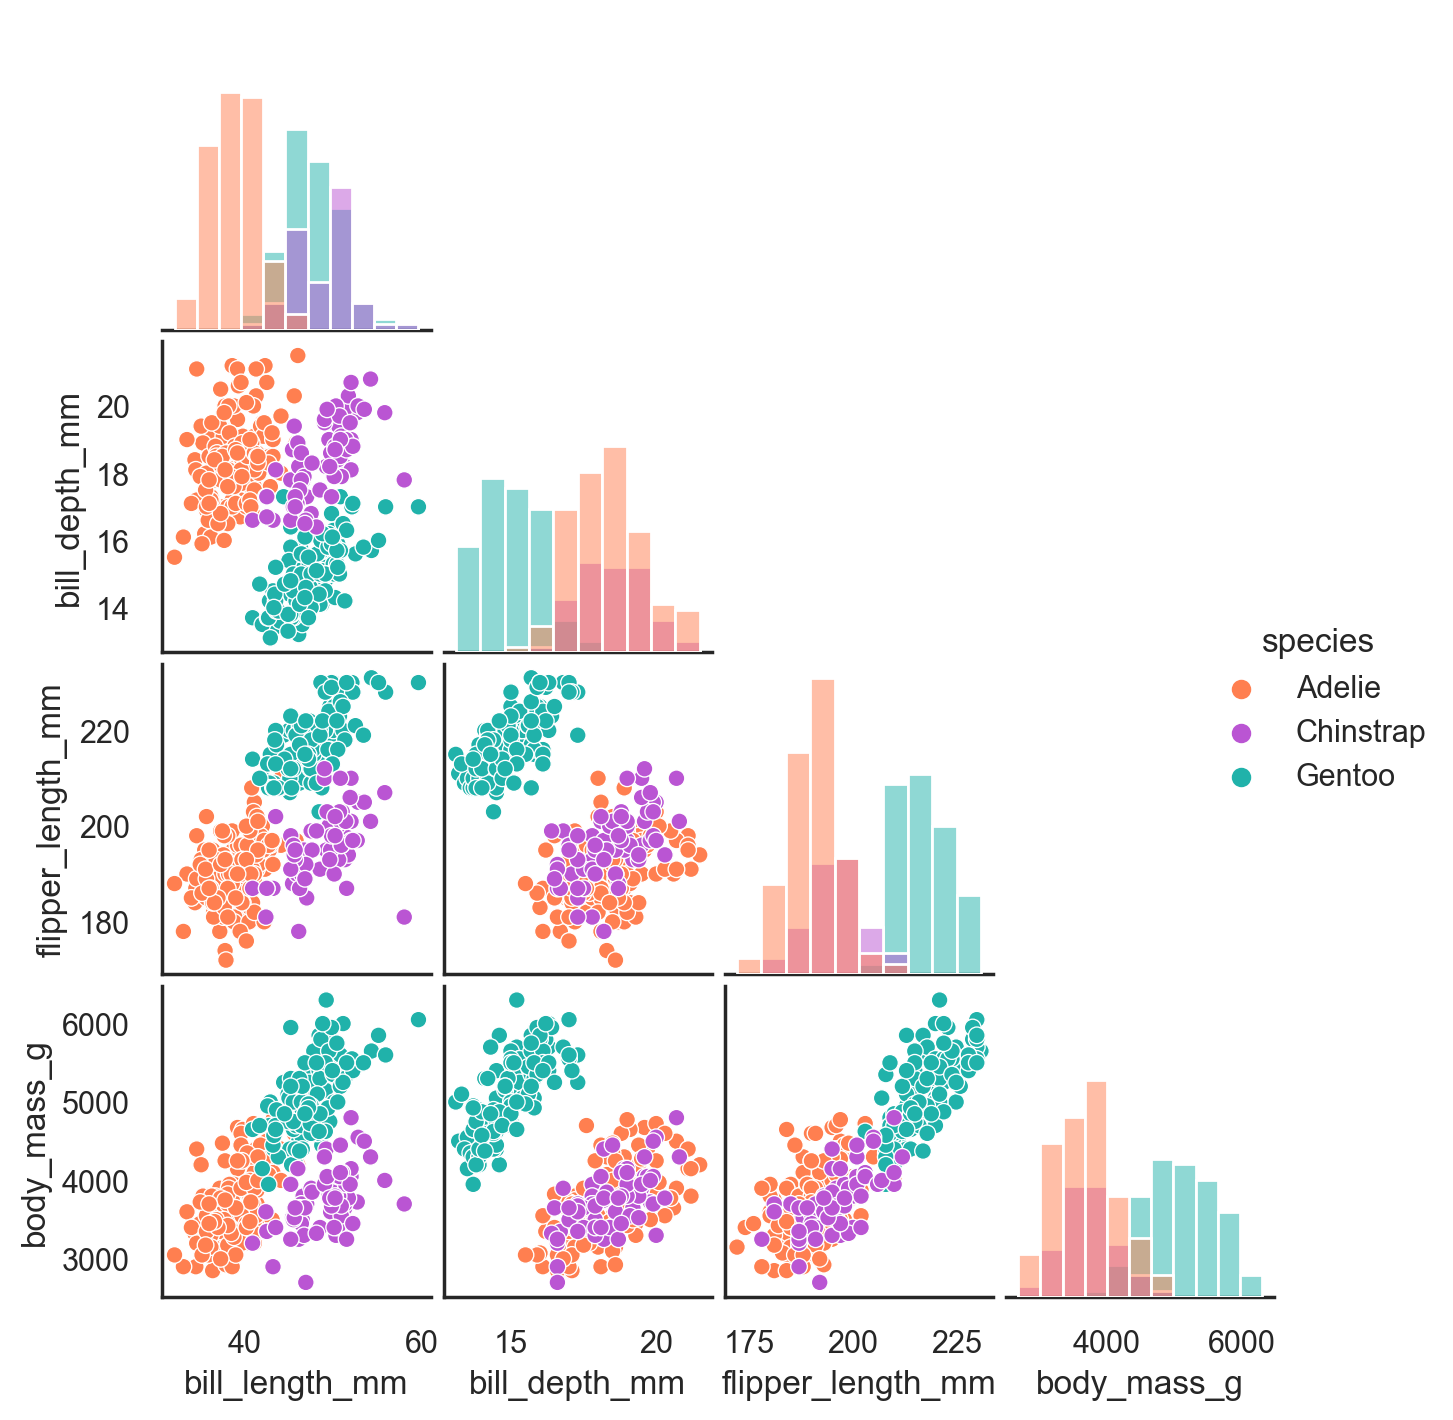

In [35]:
# We can also fit other models to the data. For example, a linear model. Regression is where we test a hypothesis about the relationship between two variables.
# First, lets explore the relationships between all the variables.

# This will take a little longer to run.
figure = sns.pairplot(penguins_clean, hue="species", diag_kind="hist", corner=True, palette=colour_dict)
figure.fig.set_figheight(7)
figure.fig.set_figwidth(7)
# 
# We can see that there is a relationship between body mass and bill length.

In [36]:

# We can use the ols() function to fit a linear model. We need to tell it the formula we want to use.

# We can use the ~ to tell it we want to compare the two variables.
# This time the two variables are continuous data. 
# The fit() function fits the model to the data.

linear_model = ols('body_mass_g ~ bill_length_mm', data=penguins_clean).fit()

# We can use the summary() function to get a summary of the model.
print(linear_model.summary())

# Or if that is too much info... just individual results. 
r_squared = round(linear_model.rsquared,2)
print("The R squared value is " + str(r_squared))
p_value_to_words(linear_model.f_pvalue)

# The p value is a test to see if there is a relationship between the two variables.
# The R squared value is a measure of how much of the variation in the data is explained by the model.

# The model coefficient is the slope of the line -- how much the body mass changes for each unit change in bill length. So for every mm increase in bill length, the body mass increases by 86.8g.
# The intercept is the y intercept of the line -- the body mass when the bill length is 0 (388.8g).


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           1.54e-32
Time:                        22:44:38   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.

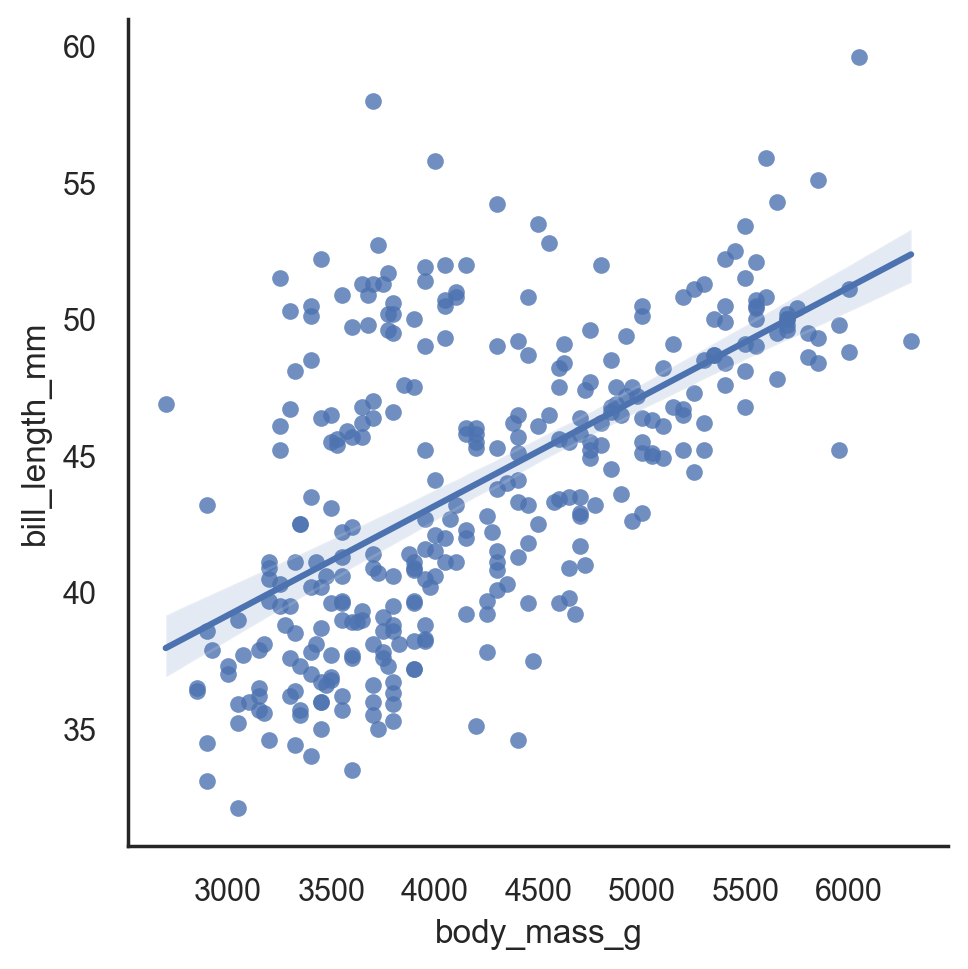

In [37]:
# # It would be nice to plot our linear regression results. 
# We can use the seaborn library to do this.
# We can use the lmplot() function to plot a linear regression.

sns.lmplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean)

# However, we also know there are three species in this data set. 

In [38]:
# First, we're going to put our linear model in a function.

# ----------------------------------------------------------------------------------------------------------------------
def linear_model_species(penguins_clean,species_name, x_variable, y_variable):

    # This function needs a string with the ~ in it to show which variables to use. 
    # We can create this string using the + sign
    model_string = y_variable + " ~ " + x_variable

    # Now we can create the model and run it on just the subset of data we want. 
    linear_model = ols(model_string, data=penguins_clean[penguins_clean["species"] == species_name], group="species").fit()

    r_squared = round(linear_model.rsquared,2)
    print(species + " (" + x_variable + " vs " + y_variable + ") :  R^2 value = " + str(r_squared))

    # We can call our previous function from inside here. This is called a nested function.
    p_value_to_words(linear_model.f_pvalue)
    print("\n")

    return linear_model

# ----------------------------------------------------------------------------------------------------------------------
# Now we can loop through the species and run the function on each one.

# We need a new species list as we probably ruined the last one.
species_list = penguins_clean["species"].unique().tolist()

# Setting up what we're about to do...
print("Linear model results for bill length vs body mass for each species...")

# Beginning the for loop with the different species...
for species in species_list:
    # Running our function on each species.
    model = linear_model_species(penguins_clean,species, "body_mass_g", "bill_length_mm")


Linear model results for bill length vs body mass for each species...
Adelie (body_mass_g vs bill_length_mm) :  R^2 value = 0.3
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Gentoo (body_mass_g vs bill_length_mm) :  R^2 value = 0.44
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Chinstrap (body_mass_g vs bill_length_mm) :  R^2 value = 0.26
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***




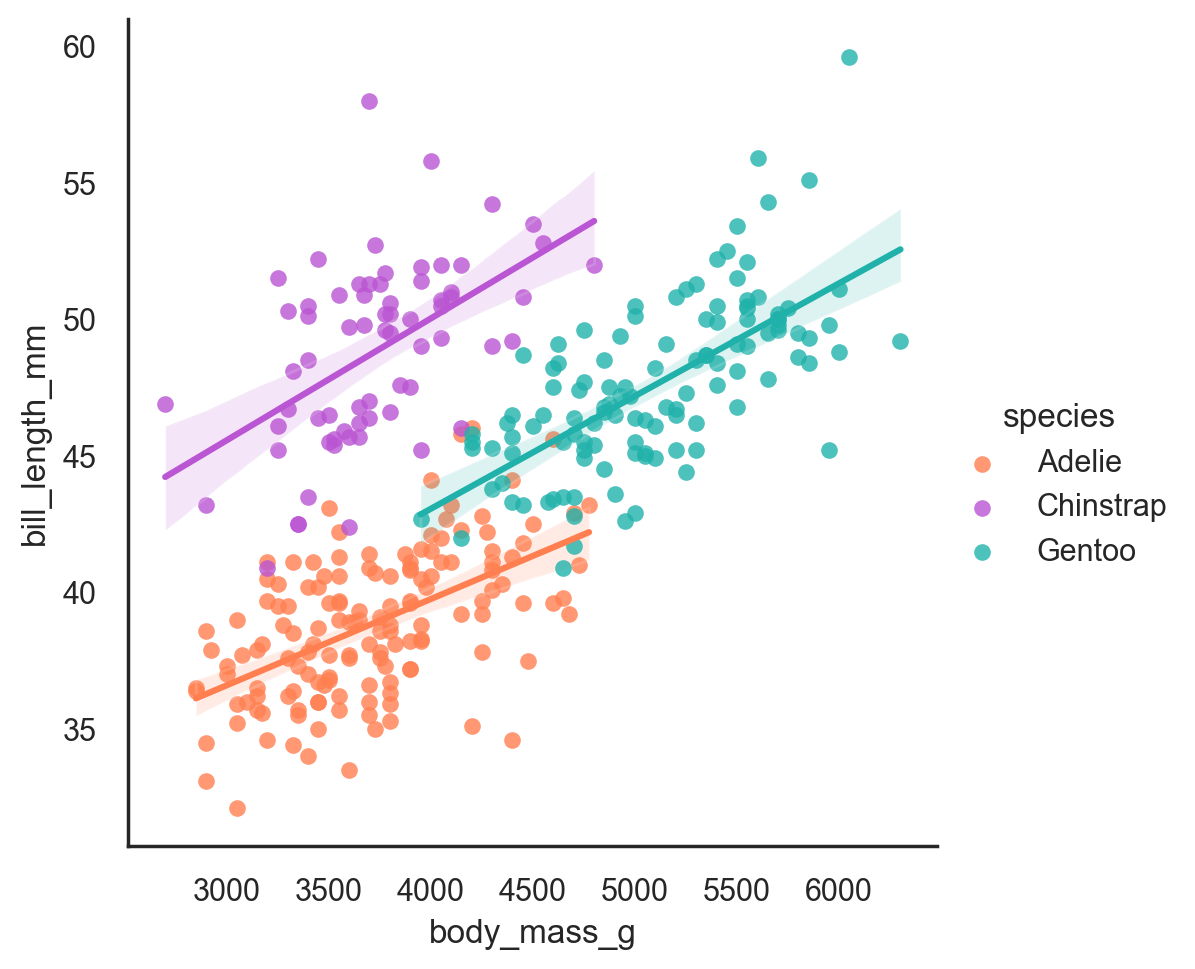

In [39]:
# We need to tell it the x and y variables, and the data to use. We can also tell which variable to use to colour it. 
# We can also use a colour dictionary to plot the different species in different colours.

colour_dict = {"Adelie": "coral", "Gentoo": "lightseagreen", "Chinstrap": "mediumorchid"}

sns.lmplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict)

# It would be good to combine our model results with this figure. For that we can use the annotate() function.


Linear model results for flipper length vs body mass for each species...
Adelie (body_mass_g vs bill_length_mm) :  R^2 value = 0.3
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Gentoo (body_mass_g vs bill_length_mm) :  R^2 value = 0.44
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Chinstrap (body_mass_g vs bill_length_mm) :  R^2 value = 0.26
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***




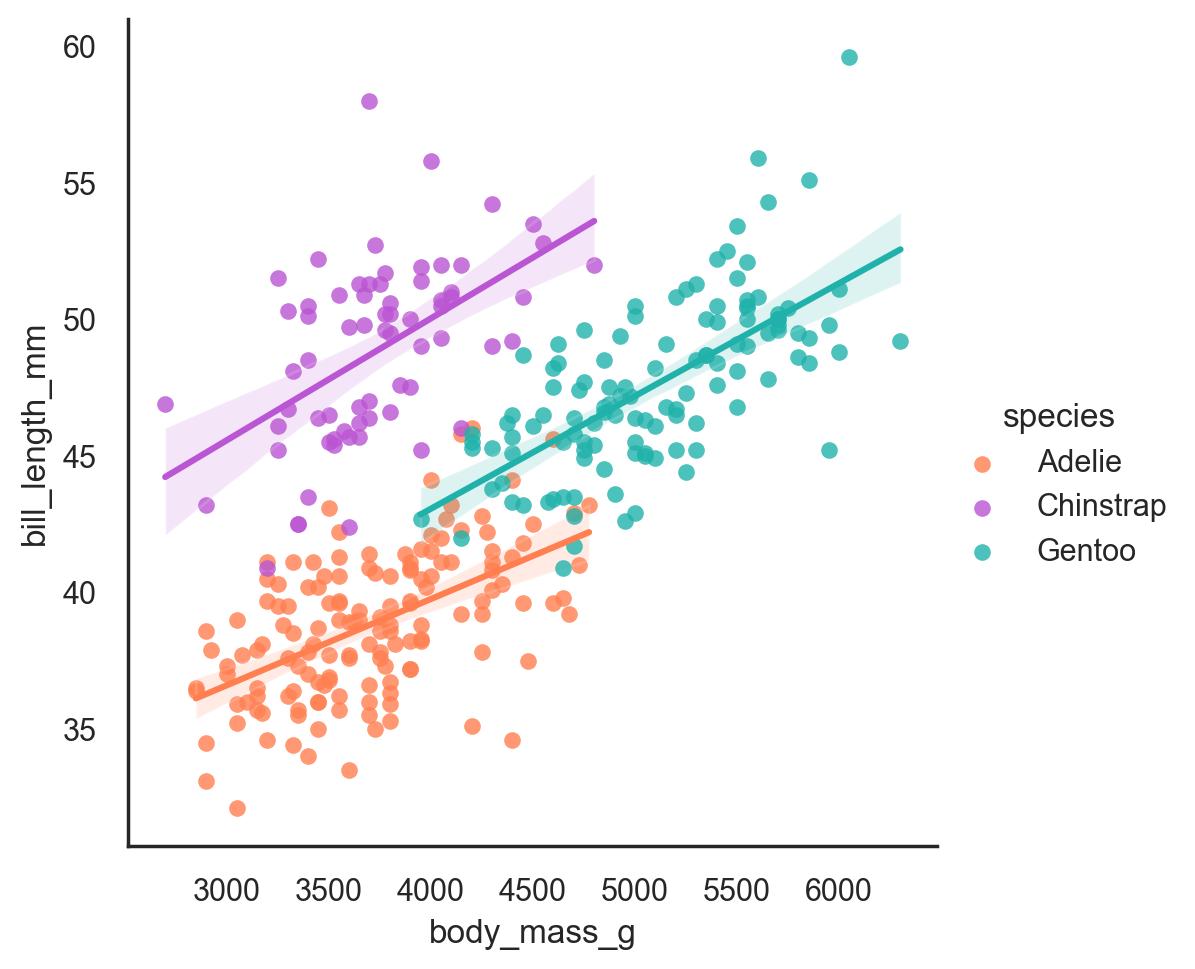

In [40]:

# We can add annotations to the plot using the annotate() function. Here we want to add the R squared value to the plot.
# First create the plot. Then we need to save the R squared values and p values for each species in the loop. 

sns.lmplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict)

species_list = penguins_clean["species"].unique().tolist()

# Printing so we know what we're running
print("Linear model results for flipper length vs body mass for each species...")

# Starting the loop
for species in species_list:

    # Running the function on each species.
    model = linear_model_species(penguins_clean,species, "body_mass_g", "bill_length_mm")
    
    # Now plot an annotation for each loop. 
    text = "R^2 = " + str(round(model.rsquared,2))
    plt.annotate(text, xy = (5000,180))

# We're missing some final steps. We need to give the annotations coordinates, because they're all plotted on top of each other. 
# We also want to colour the text the same as the species. Finally, we want to add asterisks depending on the p value.




Linear model results for bill length vs body mass for each species...
Adelie (body_mass_g vs bill_length_mm) :  R^2 value = 0.3
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Gentoo (body_mass_g vs bill_length_mm) :  R^2 value = 0.44
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Chinstrap (body_mass_g vs bill_length_mm) :  R^2 value = 0.26
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***




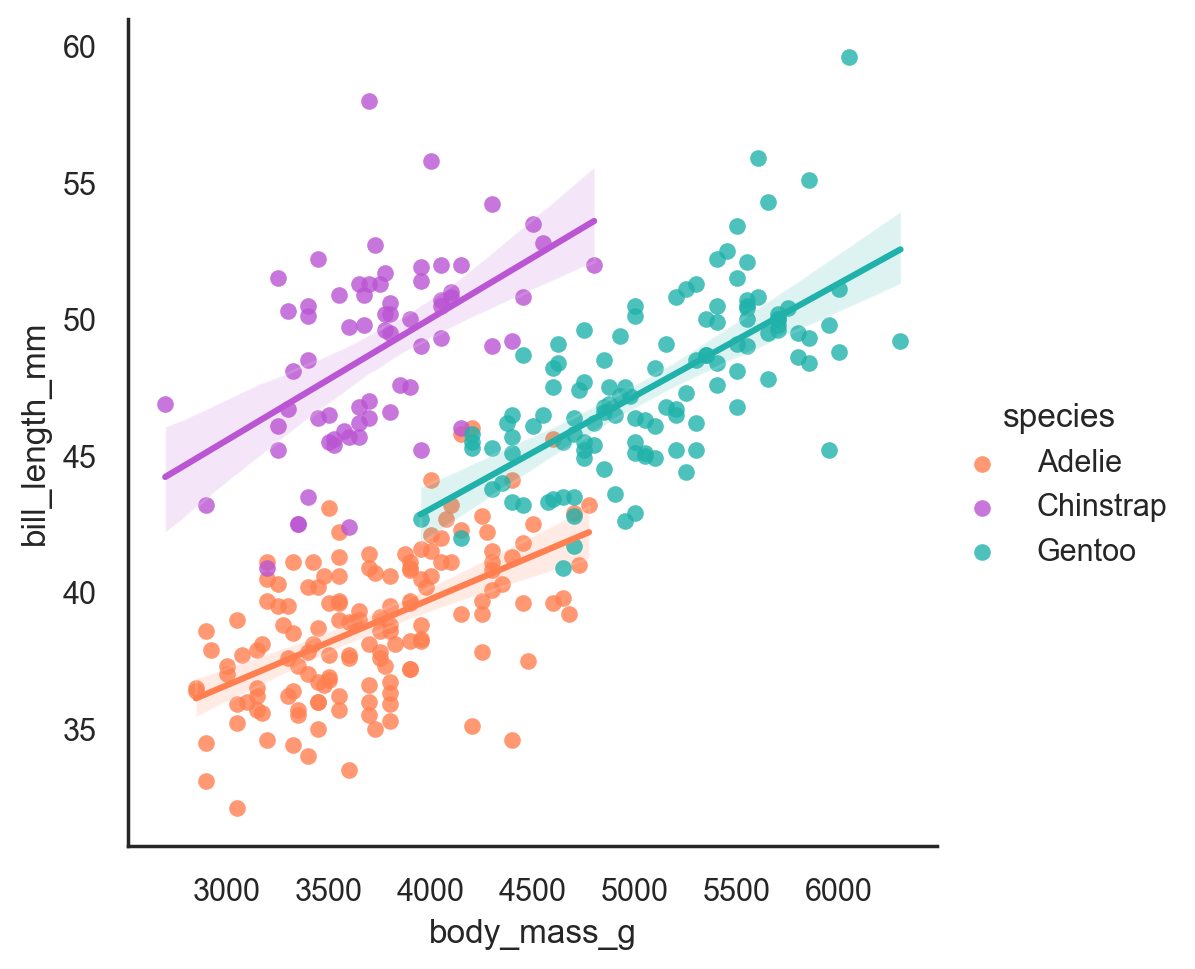

In [41]:
# We can add annotations to the plot using the annotate() function. Here we want to add the R squared value to the plot.
# First we need to save the R squared values for each species in the loop. 

# For speed, we can hard code the text coordinates. We're making a new dictionary. Each value this time is a tuple, google it if you are interested!
coords = {"Adelie": (4900, 195), "Gentoo": (6100, 225), "Chinstrap": (4800, 204)}

sns.lmplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict)

species_list = penguins_clean["species"].unique().tolist()

# Printing so we know what we're running
print("Linear model results for bill length vs body mass for each species...")

# Starting the loop
for species in species_list:

    # Running the function on each species.
    model = linear_model_species(penguins_clean,species, "body_mass_g", "bill_length_mm")
    
    # Now plot an annotation for each loop. 
    text = "R^2 = " + str(round(model.rsquared,2))

    # Now we're using the coords dictionary and the colour dictionary. 
    plt.annotate(text, xy = coords[species], color = colour_dict[species])


# Now we're using 2 dictionaries! The the annotation coordinates, and the colours.



Linear model results for bill length vs body mass for each species...
Adelie (body_mass_g vs bill_length_mm) :  R^2 value = 0.3
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Gentoo (body_mass_g vs bill_length_mm) :  R^2 value = 0.44
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***


Chinstrap (body_mass_g vs bill_length_mm) :  R^2 value = 0.26
*** The p-value is smaller than the critical threshold. p-value is < 0.001. ***




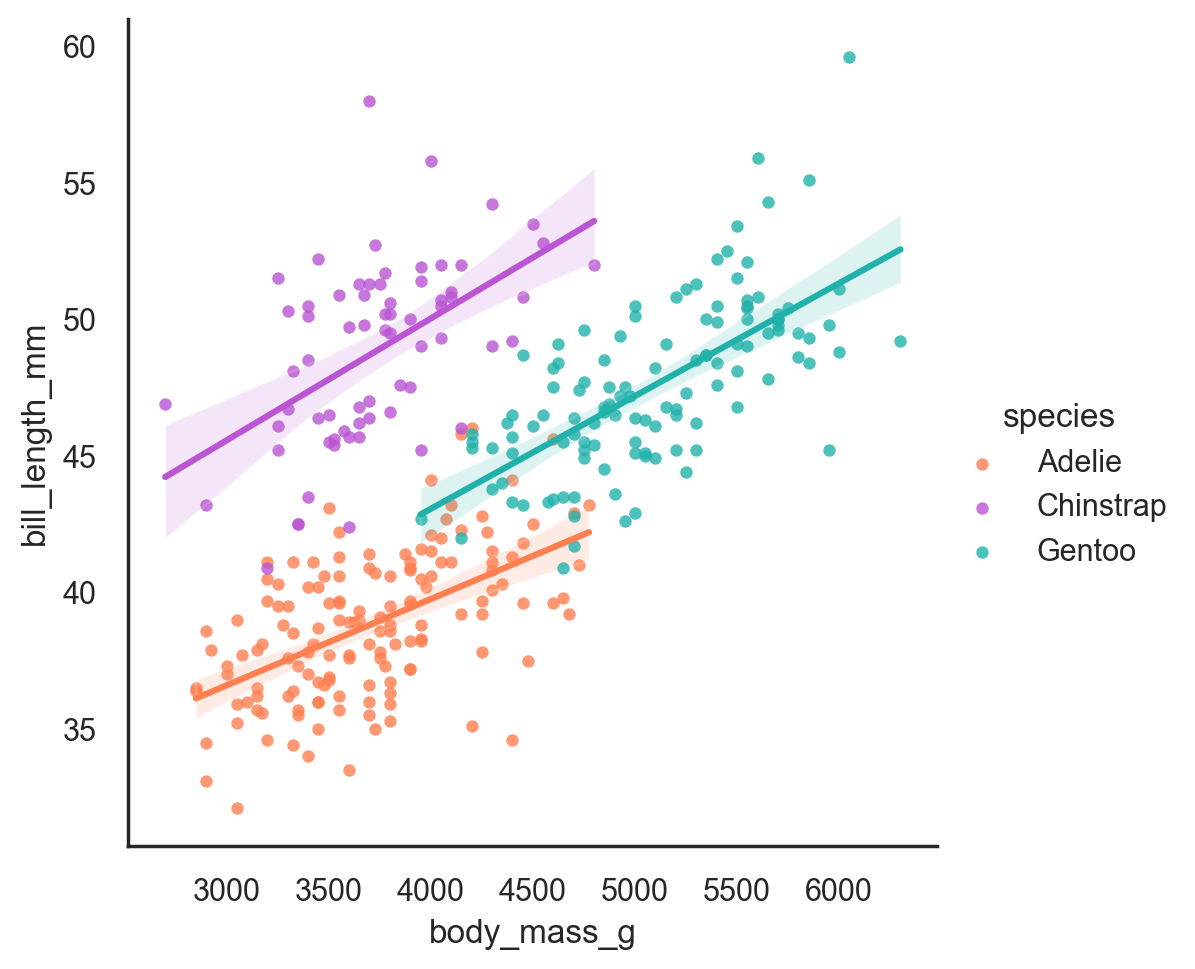

In [42]:
# For fun we can also add an if statement to add a little asterisk. Showing the significance of the p value.

def asterisk_signficance(p_value):
    if p_value < 0.001:
        asterisk_string = "***"
    elif p_value < 0.01:
        asterisk_string = "**"
    elif p_value < 0.05:
        asterisk_string = "*"
    else:
        asterisk_string = ""
    return asterisk_string


coords = {"Adelie": (4900, 195), "Gentoo": (6100, 225), "Chinstrap": (4800, 204)}

# With seaborn, we can make the marker size smaller using the scatter_kws argument.
sns.lmplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict, scatter_kws={"s": 20})

species_list = penguins_clean["species"].unique().tolist()

# Printing so we know what we're running
print("Linear model results for bill length vs body mass for each species...")

# Starting the loop
for species in species_list:

    # Running the function on each species.
    model = linear_model_species(penguins_clean,species, "body_mass_g", "bill_length_mm")
    
    # Calling our function to get the asterisk string dependent on the value of the p value from the linear model. 
    asterisk_string = asterisk_signficance(model.f_pvalue)

    # Now plot an annotation for each loop, now including our new asterisks. 
    text = "R^2 = " + str(round(model.rsquared,2)) + asterisk_string

    # Now we're using the coords dictionary and the colour dictionary. 
    plt.annotate(text, xy = coords[species], color = colour_dict[species])




           random effect   intercept     slope
Adelie         91.832422  206.417014  90.13982
Chinstrap    -780.422436 -665.837844  90.13982
Gentoo        688.590014  803.174606  90.13982


<AxesSubplot: xlabel='body_mass_g', ylabel='bill_length_mm'>

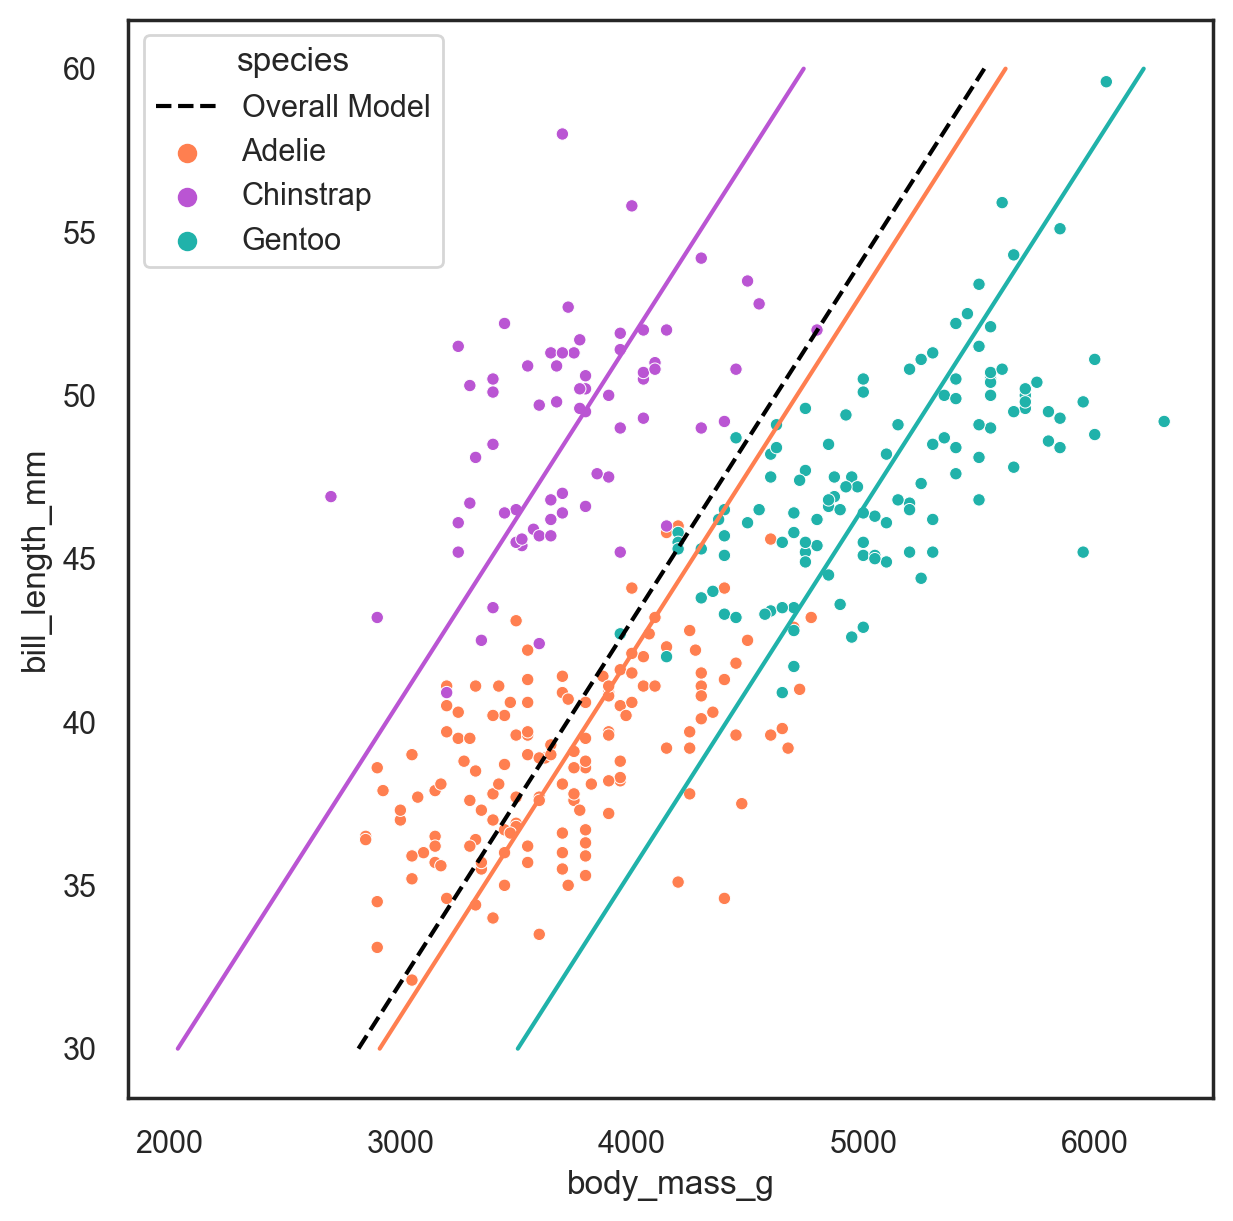

In [43]:
# We could also try a linear mixed effects model. This is a more complex model, but it can be useful for more complex data.
import numpy as np

# We can also add a random effect to the model. This is a random intercept for each species. 
# 
# Random Intercept Model: Each species gets a different intercept, but the slope is the same.
lmm_model = sm.MixedLM.from_formula("body_mass_g ~ bill_length_mm", data=penguins_clean, groups="species").fit()

# The overall intercept and overall slope are...
overall_intercept = lmm_model.fe_params["Intercept"]
overall_slope     = lmm_model.fe_params["bill_length_mm"]


# Lets put the results in a dataframe. The random effect of each species on the intercept is in the random effects variable. They're unfortunately in a dictionary so I need to extract them.
species_intercepts = np.array(list(lmm_model.random_effects.values()))
species_names = lmm_model.random_effects.keys()

# We can turn the random_effects into a dataframe.
result_df = pd.DataFrame(species_intercepts, index = species_names, columns = ["random effect"])


result_df["intercept"] = overall_intercept + result_df["random effect"]
result_df["slope"] = overall_slope
print(result_df)

# Now we can plot the results. 

# We can use the intercept and slope values to plot the lines for each species.
plt.figure(figsize=(7,7))

# Using the dataframe we can plot three lines. We need to make a loop. 

for species in species_list:
    # We can use the dataframe to get the intercept and slope for each species. 
    intercept = result_df.loc[species, "intercept"]
    slope = result_df.loc[species, "slope"]
    
    # Now we can plot the line. 
    y = np.linspace(30, 60, 10)
    x = intercept + slope * y
    plt.plot(x, y, color = colour_dict[species])

# We can also plot the overall model ignoring species
y = np.linspace(30, 60, 10)
x = overall_intercept + overall_slope * y
plt.plot(x, y, color = "black", linestyle = "--", label = "Overall Model")

# And plotting the real data. 
sns.scatterplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict, ax = plt.gca(), s = 20)


/Users/lfrance/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/004_REG/001_Teaching/Python_Stats/.venv/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lfrance/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/004_REG/001_Teaching/Python_Stats/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/lfrance/Library/CloudStorage/OneDrive-TheAlanTuringInstitute/004_REG/001_Teaching/Python_Stats/.venv/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<AxesSubplot: xlabel='body_mass_g', ylabel='bill_length_mm'>

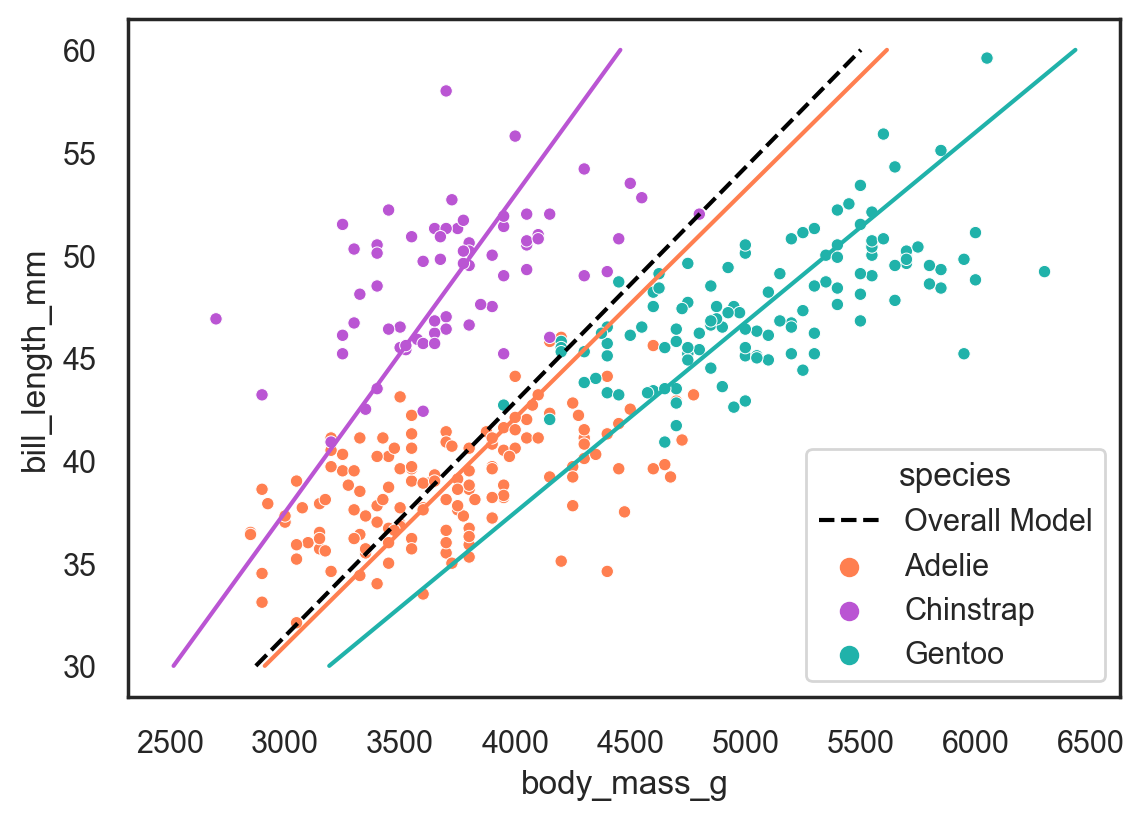

In [57]:
# We can now try a different mixed effects model. This time we'll add a random slope for each species.

# Random Slope Model: Each species gets a different slope, but the intercept is the same.
lmm_model = sm.MixedLM.from_formula("body_mass_g ~ bill_length_mm", data=penguins_clean, groups="species", re_formula="~bill_length_mm").fit()

# The overall intercept and overall slope are...
overall_intercept = lmm_model.fe_params["Intercept"]
overall_slope     = lmm_model.fe_params["bill_length_mm"]

# Lets put the results in a dataframe. The random effect of each species on the intercept is in the random effects variable. They're unfortunately in a dictionary so I need to extract them.
species_slopes_intercepts = np.array(list(lmm_model.random_effects.values()))
species_names = list(lmm_model.random_effects.keys())

# We can turn the random_effects into a dataframe.
result_df = pd.DataFrame(species_slopes_intercepts, index = species_names, columns = ["random intercept", "random slope"])
result_df["intercept"] = overall_intercept + result_df["random intercept"]
result_df["slope"] = overall_slope + result_df["random slope"]
result_df

# Now we can plot the results.


for species in species_list:
    # We can use the dataframe to get the intercept and slope for each species. 
    intercept = result_df.loc[species, "intercept"]
    slope = result_df.loc[species, "slope"]
    
    # Now we can plot the line. 
    y = np.linspace(30, 60, 10)
    x = intercept + slope * y
    plt.plot(x, y, color = colour_dict[species])

# We can also plot the overall model ignoring species
y = np.linspace(30, 60, 10)
x = overall_intercept + overall_slope * y
plt.plot(x, y, color = "black", linestyle = "--", label = "Overall Model")

# And plotting the real data. 
sns.scatterplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict, ax = plt.gca(), s = 20)




In [ ]:
# We can now try a different mixed effects model. This time we'll add a random slope for each species.

def linear_mixed_effects_species(df, model_string, mixed_effects_string=None):
    
    response_variable = model_string.split("~")[0].strip()

    lmm_model = sm.MixedLM.from_formula(model_string, 
                                        data=df, 
                                        groups="species", re_formula=mixed_effects_string).fit()

    # The overall intercept and overall slope are...
    overall_intercept = lmm_model.fe_params["Intercept"]
    overall_slope     = lmm_model.fe_params[response_variable]

    # Lets put the results in a dataframe. The random effect of each species on the intercept is in the random effects variable. They're unfortunately in a dictionary so I need to extract them.
    species_slopes_intercepts = np.array(list(lmm_model.random_effects.values()))
    species_names = list(lmm_model.random_effects.keys())

# We can turn the random_effects into a dataframe.
    result_df = pd.DataFrame(species_slopes_intercepts, index = species_names, columns = ["random intercept", "random slope"])
    result_df["intercept"] = overall_intercept + result_df["random intercept"]
    result_df["slope"] = overall_slope + result_df["random slope"]

    return overall_slope, overall_intercept, result_df

# Now we can plot the results.


for species in species_list:
    # We can use the dataframe to get the intercept and slope for each species. 
    intercept = result_df.loc[species, "intercept"]
    slope = result_df.loc[species, "slope"]
    
    # Now we can plot the line. 
    y = np.linspace(30, 60, 10)
    x = intercept + slope * y
    plt.plot(x, y, color = colour_dict[species])

# We can also plot the overall model ignoring species
y = np.linspace(30, 60, 10)
x = overall_intercept + overall_slope * y
plt.plot(x, y, color = "black", linestyle = "--", label = "Overall Model")

# And plotting the real data. 
sns.scatterplot(x="body_mass_g", y="bill_length_mm", data=penguins_clean, hue="species", palette = colour_dict, ax = plt.gca(), s = 20)

In [ ]:
# Now we can try a multiple linear regression. We can ignore the species now. 
multi_linear_model = ols("body_mass_g ~ bill_length_mm + flipper_length_mm", data=penguins_clean).fit()
multi_linear_model.summary()

# What are we testing here? 

# We are predicting body mass from bill length and flipper length. 
# The results show us for example, that if we control for flipper length, a 1mm increase in bill length is associated with a 4.9g increase in body mass. 
# Controlling for bill length, a 1mm increase in flipper length is associated with a 48g increase in body mass.

# There's also a t test for each variable. This is testing if the variable is significantly associated with the body mass. 
# We can see bill length is not significant, but flipper length is.

# Finally we can look at the R squared value. This is the proportion of the variance in body mass that is explained by the model.
# This is a very high value, so we can say that the model explains a lot of the variance in body mass.

# The more variables we add, the higher the R squared will be, and the more overfitted our model will be. 
# We can also look at the adjusted R squared value. This is the proportion of the variance in body mass that is explained by the model after accounting for the number of variables in the model.

# We can also look at the p value for the F test. This is testing if the model is significantly better than a model with no variables.
# We can see that the model is significantly better than a model with no variables (phew).


In [ ]:
# Now we have our model, we can make a prediction. We can predict the body mass of a penguin with a bill length of 40mm and a flipper length of 200mm.

# We can use the predict() function. We need to pass it a dataframe with the same column names as the model.

prediction = multi_linear_model.predict(pd.DataFrame({"bill_length_mm": [40], "flipper_length_mm": [200]}))
print("The predicted body mass is " + str(round(prediction[0],2)) + "g")

# Lets guess a really big penguin. 

prediction = multi_linear_model.predict(pd.DataFrame({"bill_length_mm": [1000], "flipper_length_mm": [10000]}))
prediction_tonnes = prediction[0]/1000000
print("The predicted body mass is " + str(round(prediction_tonnes,2)) + " tonnes")


The R squared value for the test set is 0.74


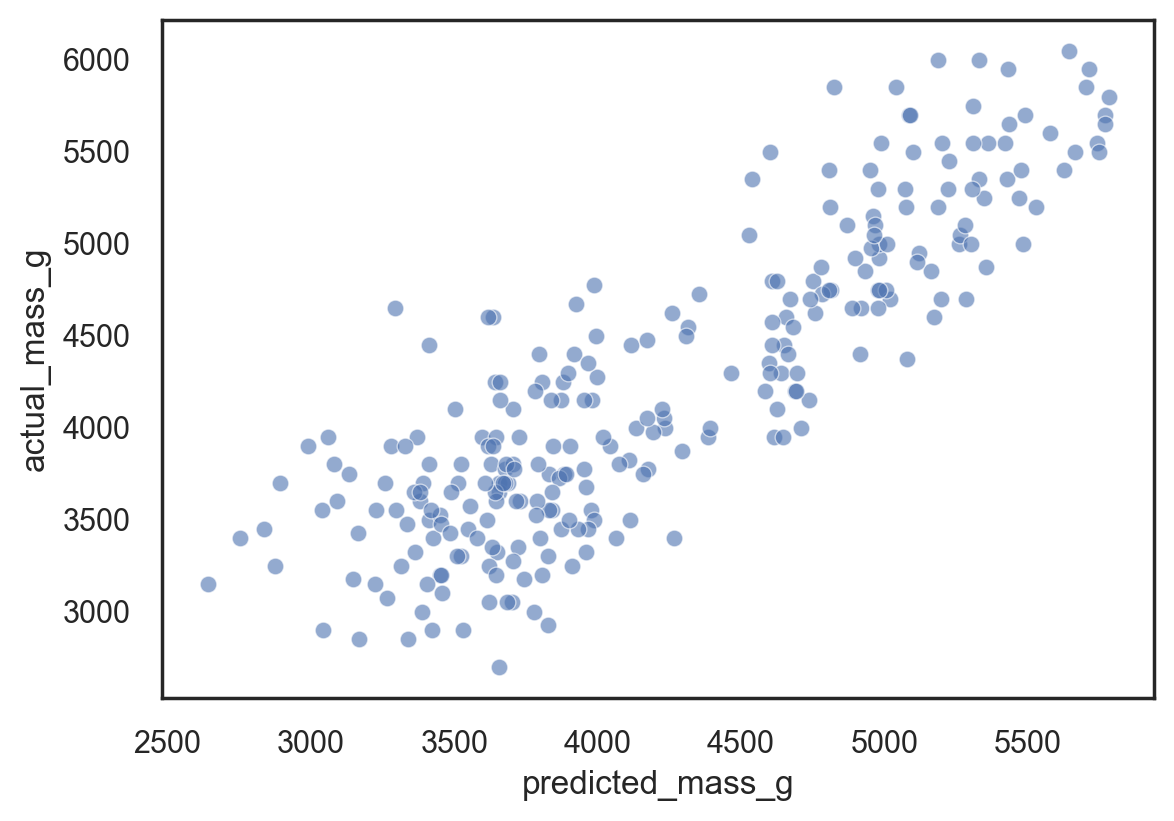

In [53]:

# This ability to predict gives us a very special ability to test our hypotheses. 
# We can create a model using most of the data, and then test it on the remaining data.

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# We can use the train_test_split() function to split our data into a training set and a test set.
test_data, train_data = train_test_split(penguins_clean, test_size = 0.2, random_state = 42)

# We can then use the training set to create a model.
multi_linear_model = ols("body_mass_g ~ flipper_length_mm + bill_length_mm", data=train_data).fit()

# We can then use the test set to test the model.
test_results = multi_linear_model.predict(test_data)

# We can then compare the predicted values to the actual values.
test_results = pd.DataFrame({"predicted_mass_g": test_results, "actual_mass_g": test_data["body_mass_g"]})

# We can then plot the predicted values against the actual values.
sns.scatterplot(x="predicted_mass_g", y="actual_mass_g", data=test_results, alpha=0.6)

# We can then calculate the R squared value for the test set.
r_squared = r2_score(test_results["actual_mass_g"], test_results["predicted_mass_g"])
print("The R squared value for the test set is " + str(round(r_squared,2)))

# This is the beginnings of the workflow used in machine learning. We can use this to test our models and see how well they perform.



In [54]:

# We can create a logistic regression model to predict species from bill length and flipper length.
from sklearn.linear_model import LogisticRegression

logistic_model  = LogisticRegression(random_state=0).fit(train_data[["body_mass_g", "flipper_length_mm"]], train_data["species"])
logistic_model.score(test_data[["body_mass_g", "flipper_length_mm"]], test_data["species"])

# We can use the predict() function to predict the species of a penguin with a body mass of 3000g and a flipper length of 100mm.
prediction = logistic_model.predict(pd.DataFrame({"body_mass_g": [3000], "flipper_length_mm": [100]}))
print("The predicted species is " + prediction)

# We can test the model's  performance on the test set.
logistic_model.score(test_data[["body_mass_g", "flipper_length_mm"]], test_data["species"])



['The predicted species is Gentoo']


0.6654135338345865